<a href="https://colab.research.google.com/github/qonitah-sarah/supervised-learning-occupancy-prediction/blob/main/Supervised_Learning_Occupation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
!pip install numpy==1.24.4 --force-reinstall
!pip install scipy==1.11.4 --force-reinstall
!pip install imbalanced-learn xgboost
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
blosc2 3.5.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=920b97b834654b7a3acba98b2399c9a929199fc0259d1d5dc0c939dcb0cc1220
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=932a01f2ac1a6808a39cddfec1263d706a389cd4bd372a37d6a3efc3a483e070
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
# import pandas for data wrangling
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split, cross_validate
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import tree module
from sklearn import tree
# import xgboost classifier
from xgboost import XGBClassifier
# load SVM classifier model
from sklearn.svm import SVC


# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

## Load Dataset

In [ ]:
df = pd.read_csv('/content/Occupancy_Estimation.csv')

In [ ]:
df.head()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0  2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1  2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2  2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3  2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4  2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   

   S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
0        34        53        40      0.08      0.19      0.06      0.06   
1        33        53        40      0.93      0.05      0.06      0.06   
2        34        53        40      0.43      0.11      0.08      0.06   
3        34        53        40      0.41      0.10      0.10      0.09   
4        34        54        40      0.18      0.06      0.06      0.06   

   S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
0     390      0.769231       0       0                     1  
1     390      0.646154       0       0                     1  
2     390      0.519231       0       0                     1  
3     390      0.388462       0       0                     1  
4     390      0.253846       0       0                     1

In [ ]:
df.tail()

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
10124  2018/01/11  08:58:07    25.06    25.13    24.69    25.31         6   
10125  2018/01/11  08:58:37    25.06    25.06    24.69    25.25         6   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   
10128  2018/01/11  09:00:09    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
10124         7        33        22      0.09      0.04      0.06      0.08   
10125         7        34        22      0.07      0.05      0.05      0.08   
10126         7        34        22      0.11      0.05      0.06      0.08   
10127         7        34        22      0.08      0.08      0.10      0.08   
10128         7        34        22      0.08      0.05      0.06      0.08   

       S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
10124     345           0.0       0       0                     0  
10125     345           0.0       0       0                     0  
10126     345           0.0       0       0                     0  
10127     345           0.0       0       0                     0  
10128     345           0.0       0       0                     0

In [ ]:
df.sample(5)

Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
6505  2017/12/25  19:33:04    25.44    25.44    25.13    26.00         0   
161   2017/12/22  12:14:26    25.63    28.00    25.13    26.00       156   
3407  2017/12/23  16:48:58    26.13    25.88    25.50    26.31       119   
4481  2017/12/24  02:05:00    25.38    25.38    24.81    25.75         0   
5792  2017/12/25  13:23:55    25.31    25.31    25.19    26.00        17   

      S2_Light  S3_Light  S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  \
6505         0         0         0      0.07      0.05      0.06      0.09   
161        241        77        59      1.05      1.01      0.31      0.21   
3407        24       195        16      0.47      0.44      0.95      0.32   
4481         0         0         0      0.06      0.06      0.06      0.06   
5792        20        74        54      0.07      0.06      0.07      0.10   

      S5_CO2  S5_CO2_Slope  S6_PIR  S7_PIR  Room_Occupancy_Count  
6505     355     -0.030769       0       0                     0  
161      625      1.738462       0       1                     2  
3407     575      1.765385       0       0                     2  
4481     365      0.000000       0       0                     0  
5792     355      0.000000       0       0                     0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10129 non-null  datetime64[ns]
 1   Time                  10129 non-null  object        
 2   S1_Temp               10129 non-null  float64       
 3   S2_Temp               10129 non-null  float64       
 4   S3_Temp               10129 non-null  float64       
 5   S4_Temp               10129 non-null  float64       
 6   S1_Light              10129 non-null  int64         
 7   S2_Light              10129 non-null  int64         
 8   S3_Light              10129 non-null  int64         
 9   S4_Light              10129 non-null  int64         
 10  S1_Sound              10129 non-null  float64       
 11  S2_Sound              10129 non-null  float64       
 12  S3_Sound              10129 non-null  float64       
 13  S4_Sound        

In [ ]:
df['Room_Occupancy_Count'].unique()

array([1, 2, 3, 0])

Observasi:
- Dataset terdiri dari 19 kolom dengan total 10.129 baris
- Seluruh tipe data telah sesuai kecuali pada kolom `Date` yang perlu disesuaikan dari yang awalnya berupa object beralih ke format datetime
- Tipe data ada berbagai macam yaitu datetime, object, float, dan int dimana format angka mendominasi karena data yang dihasilkan merupakan output dari alat sensor
- Kolom yang menjadi target adalah `Room_Occupancy_Count` yang merupakan jumlah penghuni yang tercatat berada di dalam ruang test lab dan diambil secara manual melalui absen, terdiri dari empat nilai unik yaitu 0, 1, 2, dan 3 sehingga model yang dibangun nantinya adalah jenis klasifikasi pada supervised learning



## Split Data

In [ ]:
df[['Date', 'Time']].head()

Date      Time
0 2017-12-22  10:49:41
1 2017-12-22  10:50:12
2 2017-12-22  10:50:42
3 2017-12-22  10:51:13
4 2017-12-22  10:51:44

Observasi: <br>
Kolom `Date` dan `Time` merupakan kolom yang akan didrop dan tidak akan dilakukan untuk analisis ke depannya karena tidak relevan dengan tujuan yang hendak dicapai

In [ ]:
df_model = df.copy()

In [ ]:
# Split data function
def temporal_train_test_split(df, target_col, split_ratio=0.8):
    df = df.drop(columns=['Date', 'Time'])
    split_index = int(len(df) * split_ratio)
    X_train = df.iloc[:split_index].drop(columns=[target_col])
    y_train = df.iloc[:split_index][target_col]
    X_test = df.iloc[split_index:].drop(columns=[target_col])
    y_test = df.iloc[split_index:][target_col]
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = temporal_train_test_split(df_model, target_col='Room_Occupancy_Count', split_ratio=0.8)

In [ ]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# kolom yang dikecualikan karena sebenarnya kategorikal
fake_num_cols = ['S6_PIR', 'S7_PIR']

# membuat kolom numerik (exclude yang palsu)
numericals_train = [col for col in num_cols if col not in fake_num_cols]

# membuat kolom kategorikal
categoricals_train = X_train.select_dtypes(include=['object']).columns.tolist()
categoricals_train += fake_num_cols

print('Hasil Pembagian:')
print("Fitur numerik:", numericals_train)
print("Fitur kategorikal:", categoricals_train)


Hasil Pembagian:
Fitur numerik: ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope']
Fitur kategorikal: ['S6_PIR', 'S7_PIR']


Observasi:
- Melakukan split data dengan perbandingan persentase 80% untuk data train dan 20% untuk data test. Pembagian tidak dilakukan secara acak namun tetap memperhatikan urutan waktu karena terdapat fitur co2 slope yang bersifat dependen dan untuk menghindari kebocaran data (data leakage)
- Membuat fitur pengelompokan fitur numerik dan kategorikal untuk memudahkan analisis ke depannya

## Data Cleaning

### Duplicate Value Handling

In [ ]:
len(df.drop_duplicates())/len(df)

1.0

Observasi: <br>
Tidak ditemukan nilai duplikat pada data

### Missing Value Handling

In [ ]:
df.isna().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [ ]:
for cc in df.columns:
    print(f"========== {cc} =========")
    display(df[cc].value_counts())
    print()

========== Date =========


Date
2017-12-23    2779
2017-12-25    1716
2017-12-22    1462
2017-12-24    1064
2017-12-26    1063
2018-01-11    1048
2018-01-10     997
Name: count, dtype: int64


========== Time =========


Time
10:49:41    1
21:43:16    1
21:39:42    1
21:40:13    1
21:40:43    1
21:41:14    1
21:41:45    1
21:42:15    1
21:42:46    1
21:43:47    1
21:38:41    1
21:44:18    1
21:44:48    1
21:45:19    1
21:45:50    1
21:46:20    1
21:46:51    1
21:47:22    1
21:39:11    1
21:38:10    1
21:48:23    1
21:33:04    1
21:29:29    1
21:30:00    1
21:30:31    1
21:31:01    1
21:31:32    1
21:32:02    1
21:32:33    1
21:33:34    1
21:37:39    1
21:34:05    1
21:34:36    1
21:35:06    1
21:35:37    1
21:36:08    1
21:36:38    1
21:37:09    1
21:47:52    1
21:48:53    1
20:47:37    1
22:04:12    1
22:00:38    1
22:01:09    1
22:01:39    1
22:02:10    1
22:02:41    1
22:03:11    1
22:03:42    1
22:04:43    1
21:59:37    1
22:05:14    1
22:05:44    1
22:06:15    1
22:06:46    1
22:07:16    1
22:07:47    1
22:08:18    1
22:00:07    1
21:59:06    1
21:49:24    1
21:53:29    1
21:49:55    1
21:50:25    1
21:50:56    1
21:51:27    1
21:51:57    1
21:52:28    1
21:52:58    1
21:54:00    1
21:58:35    1
21:55:01    1
21:55:32    1
21:56:02    1
21:56:33    1
21:57:04    1
21:57:34    1
21:58:05    1
21:28:59    1
21:28:28    1
21:27:57    1
21:02:56    1
20:59:22    1
20:59:52    1
21:00:23    1
21:00:54    1
21:01:24    1
21:01:55    1
21:02:26    1
21:03:27    1
20:57:50    1
21:03:58    1
21:04:28    1
21:04:59    1
21:05:29    1
21:06:00    1
21:06:31    1
21:07:01    1
20:58:21    1
20:57:19    1
21:27:27    1
20:52:13    1
20:48:38    1
20:49:09    1
20:49:40    1
20:50:10    1
20:50:41    1
20:51:12    1
20:51:42    1
20:52:44    1
20:56:49    1
20:53:14    1
20:53:45    1
20:54:15    1
20:54:46    1
20:55:17    1
20:55:47    1
20:56:18    1
21:07:32    1
21:08:03    1
21:08:33    1
21:22:51    1
21:19:17    1
21:19:47    1
21:20:18    1
21:20:48    1
21:21:19    1
21:21:50    1
21:22:20    1
21:23:22    1
21:09:04    1
21:23:52    1
21:24:23    1
21:24:54    1
21:25:24    1
21:25:55    1
21:26:25    1
21:26:56    1
21:18:46    1
21:18:15    1
21:17:45    1
21:17:14    1
21:09:35    1
21:10:05    1
21:10:36    1
21:11:06    1
21:11:37    1
21:12:08    1
21:12:38    1
21:13:09    1
21:13:40    1
21:14:10    1
21:14:41    1
21:15:11    1
21:15:42    1
21:16:13    1
21:16:43    1
22:08:48    1
22:09:19    1
22:09:49    1
23:05:29    1
23:01:54    1
23:02:25    1
23:02:55    1
23:03:26    1
23:03:57    1
23:04:27    1
23:04:58    1
23:05:59    1
23:00:53    1
23:06:30    1
23:07:01    1
23:07:31    1
23:08:02    1
23:08:32    1
23:09:03    1
23:09:34    1
23:01:24    1
23:00:22    1
22:50:10    1
22:55:16    1
22:51:42    1
22:52:12    1
22:52:43    1
22:53:13    1
22:53:44    1
22:54:15    1
22:54:45    1
22:55:47    1
22:59:52    1
22:56:17    1
22:56:48    1
22:57:19    1
22:57:49    1
22:58:20    1
22:58:50    1
22:59:21    1
23:10:04    1
23:10:35    1
23:11:06    1
23:25:23    1
23:21:49    1
23:22:20    1
23:22:50    1
23:23:21    1
23:23:52    1
23:24:22    1
23:24:53    1
23:25:54    1
23:11:36    1
23:26:25    1
23:26:55    1
23:27:26    1
23:27:57    1
23:28:27    1
23:28:58    1
23:29:29    1
23:21:18    1
23:20:48    1
23:20:17    1
23:19:46    1
23:12:07    1
23:12:38    1
23:13:08    1
23:13:39    1
23:14:09    1
23:14:40    1
23:15:11    1
23:15:41    1
23:16:12    1
23:16:43    1
23:17:13    1
23:17:44    1
23:18:15    1
23:18:45    1
23:19:16    1
22:51:11    1
22:49:39    1
22:10:20    1
22:24:38    1
22:21:03    1
22:21:34    1
22:22:05    1
22:22:35    1
22:23:06    1
22:23:37    1
22:24:07    1
22:25:09    1
22:20:02    1
22:25:39    1
22:26:10    1
22:26:40    1
22:27:11    1
22:27:42    1
22:28:12    1
22:28:43    1
22:20:33    1
22:19:32    1
22:49:08    1
22:14:25    1
22:10:51    1
22:11:21    1
22:11:52    1
22:12:23    1
22:12:53    1
22:13:24    1
22:13:55    1
22:14:56    1
22:19:01    1
22:15:26    1
22:15:57    1
22:16:28    1
22:16:58    1
22:17:29    1
22:18:00    1
22:18:30    1
22:29:14    1
22:29:44    1
22:30:15    1
22:44:33    1
22:40:58    1
22:41:29    1
22:41:59    1
22:42:30    1
22:43:01    1
22:43


========== S1_Temp =========


S1_Temp
25.44    1132
25.19    1108
25.38    1024
25.06     995
25.13     980
25.31     860
25.25     703
25.50     293
25.94     292
26.25     268
26.19     268
25.56     246
25.81     244
26.06     232
25.88     231
25.69     226
25.63     207
26.00     193
26.13     173
25.75     165
26.31     143
25.00     125
26.38      19
24.94       2
Name: count, dtype: int64


========== S2_Temp =========


S2_Temp
25.44    1389
25.13     964
25.38     947
25.06     939
25.19     896
25.31     895
25.25     769
25.75     289
25.50     276
25.81     205
25.88     191
25.63     188
25.56     173
26.81     168
26.13     164
26.19     153
25.69     129
25.00     128
26.06     126
25.94     103
26.25     100
26.00      97
26.31      84
26.38      72
26.94      50
27.06      45
26.44      40
26.63      39
27.00      34
26.88      33
27.94      33
27.13      30
27.19      26
26.75      26
24.88      24
24.94      21
28.13      17
26.56      17
27.25      16
28.00      15
27.31      15
27.50      14
26.50      14
27.38      13
26.69      13
27.88      12
27.56      12
28.06      11
27.75      11
27.81      11
28.25      10
28.19       9
24.81       9
27.44       7
27.63       7
24.75       6
28.38       6
27.69       6
28.94       6
28.50       4
28.44       4
28.81       4
28.31       3
28.56       3
28.63       2
28.69       2
29.00       2
28.75       1
28.88       1
Name: count, dtype: int64


========== S3_Temp =========


S3_Temp
24.56    812
24.63    745
24.69    651
24.94    620
24.81    611
24.88    572
25.06    570
24.75    539
25.00    525
25.13    435
25.19    390
25.38    365
25.50    344
24.50    341
25.25    295
25.31    256
25.56    253
25.75    225
25.94    213
25.88    195
24.44    195
25.44    191
25.69    177
25.81    173
25.63    162
26.00    131
26.06    105
26.13     36
26.19      2
Name: count, dtype: int64


========== S4_Temp =========


S4_Temp
25.75    728
25.69    721
25.81    703
26.31    698
25.88    624
25.63    585
25.25    541
25.44    525
25.31    525
25.56    474
25.50    448
25.94    444
25.38    413
26.00    409
26.38    375
25.19    370
26.06    355
26.13    338
26.25    312
26.19    211
25.13    147
26.44    116
25.06     34
25.00     21
26.50     10
26.56      1
24.94      1
Name: count, dtype: int64


========== S1_Light =========


S1_Light
0      5845
6       333
5       278
10      218
14      198
150     190
17      157
7       145
1       134
119     127
2       126
4       115
114     114
9       113
3       100
117      98
12       96
13       95
149      93
123      92
8        87
160      86
118      84
11       75
15       73
18       70
116      68
19       66
115      65
124      64
165      60
16       60
148      54
155      52
142      48
120      47
157      40
156      33
161      33
164      30
162      29
163      29
20       29
146      28
121      25
147      21
159      21
122      20
113      11
143      10
145       8
141       8
151       7
158       6
154       2
140       1
133       1
111       1
105       1
91        1
101       1
125       1
108       1
93        1
153       1
107       1
112       1
144       1
Name: count, dtype: int64


========== S2_Light =========


S2_Light
0      5846
6       268
7       226
5       222
20      208
19      178
10      174
24      165
14      153
1       128
2       109
4       106
22      105
8       100
234     100
3        98
23       95
12       88
15       87
11       86
16       82
235      78
249      74
9        73
21       67
236      66
35       62
25       62
239      60
13       59
18       50
244      46
26       45
17       38
37       38
254      37
36       35
237      31
248      29
227      28
38       28
253      26
27       25
238      24
33       24
247      23
243      22
231      22
34       21
252      21
29       20
255      19
226      19
28       18
242      18
251      18
228      17
232      16
256      15
230      15
233      12
40       12
31       10
241      10
39        9
240       9
250       8
246       8
30        7
32        7
245       5
257       5
225       3
216       2
229       2
187       1
183       1
220       1
207       1
185       1
200       1
258       1
Name: count, dtype: int64


========== S3_Light =========


S3_Light
0      5591
180     178
32      110
75       99
35       94
185      93
33       93
29       84
49       81
5        81
73       77
70       74
24       70
80       67
45       67
65       64
74       63
186      60
31       57
59       56
1        55
178      53
71       53
179      53
54       51
36       51
10       50
14       49
40       49
50       49
53       49
72       48
37       47
20       45
181      44
57       44
79       43
68       43
2        42
58       40
56       40
64       40
3        39
30       38
7        38
34       38
67       37
6        37
48       36
76       36
4        35
38       35
60       34
28       33
27       32
177      31
78       31
69       30
77       30
8        30
13       30
62       30
83       30
81       29
25       29
26       29
55       29
39       29
61       27
23       26
51       25
9        25
84       25
12       25
41       24
42       24
43       24
85       24
11       23
21       22
15       22
188      21
82       21
63       21
184      20
44       20
19       20
22       20
66       20
17       18
47       18
176      18
16       17
187      17
170      17
18       17
175      17
190      17
182      16
46       16
52       16
172      15
183      14
279      12
192      12
278      12
194      11
171      11
99       11
93       11
195       9
277       9
94        9
275       9
276       9
173       9
174       9
98        9
189       9
228       9
86        8
95        8
272       8
89        7
267       7
274       7
96        7
191       7
87        6
268       6
199       6
280       6
97        5
193       5
224       5
266       5
269       5
223       4
229       4
88        4
227       4
197       4
100       4
200       4
273       4
221       4
90        3
222       3
92        3
270       3
101       3
226       2
196       2
214       2
205       2
254       2
225       2
216       2
217       2
198       2
203       2
201       1
151       1
206       1
202       1
220       1
159       1
208       1
213       1
91        1
218       1
265       1
271       1
250       1
261       1
215       1
169       1
Name: count, dtype: int64


========== S4_Light =========


S4_Light
0     5599
10     325
7      201
20     176
21     168
11     139
53     134
54     131
22     129
24     127
49     108
45     108
35     103
14      97
59      93
5       91
23      84
1       81
12      72
29      71
40      69
60      66
19      64
2       61
16      58
58      58
51      57
18      57
30      57
41      56
44      55
26      55
15      54
3       53
33      52
34      50
70      49
13      48
4       48
6       48
9       48
50      46
46      46
17      44
36      44
8       42
57      42
61      40
31      40
25      39
52      38
56      37
28      37
43      35
27      34
42      32
62      31
47      29
32      29
39      26
48      26
72      25
55      25
38      21
37      19
73      19
71      18
63      17
65      11
74      10
66       7
69       7
67       6
64       5
68       2
Name: count, dtype: int64


========== S1_Sound =========


S1_Sound
0.07    3833
0.08    3501
0.06     779
0.09     244
0.10      92
0.11      59
0.12      52
0.13      47
0.15      33
0.14      32
0.19      31
0.21      31
0.16      28
0.37      27
0.63      26
0.17      25
0.32      22
0.41      22
0.43      22
0.45      22
0.31      21
0.42      21
0.58      20
0.38      20
0.20      20
0.39      19
0.24      19
0.18      19
0.80      18
0.55      18
0.64      18
0.49      18
0.75      18
0.71      17
0.61      17
0.48      16
0.33      16
0.53      16
0.40      16
0.34      16
0.44      16
0.26      16
0.29      16
0.52      16
0.50      15
0.36      15
0.54      15
0.83      14
0.46      14
0.25      14
0.62      14
0.88      13
0.30      13
0.47      13
0.28      13
0.56      13
0.51      12
0.23      12
0.79      12
0.27      12
0.68      12
0.35      12
0.70      12
0.73      12
0.77      11
0.59      11
0.67      11
0.22      11
0.66      11
0.65      11
0.76      11
0.57      11
0.84      10
0.90      10
0.69      10
0.72      10
0.74       9
0.60       9
0.99       8
0.82       8
0.94       7
0.93       7
1.10       7
1.20       7
1.27       7
1.14       7
0.91       7
0.86       6
1.07       6
0.89       6
1.04       6
1.08       6
1.13       5
1.01       5
1.09       5
1.29       5
1.05       5
1.33       5
1.18       5
0.85       5
1.15       5
0.96       5
0.78       5
1.25       5
1.53       4
1.26       4
0.97       4
1.50       4
1.19       4
0.92       4
1.12       4
1.32       4
2.18       4
1.06       4
0.87       4
1.52       3
1.73       3
1.61       3
1.22       3
1.74       3
1.78       3
1.62       3
1.02       3
0.95       3
0.81       3
0.98       3
1.03       2
1.40       2
1.84       2
3.02       2
1.46       2
2.68       2
1.11       2
1.44       2
1.39       2
1.64       2
1.24       2
1.59       2
1.57       2
1.31       2
1.63       2
1.58       2
1.17       2
3.84       2
1.28       2
1.60       2
2.32       2
1.81       2
2.42       2
1.51       2
2.88       2
1.16       2
1.56       2
2.04       2
1.48       2
2.56       1
3.75       1
3.83       1
1.36       1
2.14       1
1.70       1
3.80       1
1.67       1
1.72       1
2.17       1
2.21       1
3.10       1
1.90       1
3.88       1
1.00       1
1.82       1
2.94       1
1.47       1
1.42       1
3.06       1
1.79       1
3.09       1
2.53       1
3.60       1
1.38       1
2.90       1
1.92       1
2.02       1
2.30       1
2.00       1
1.41       1
3.44       1
2.86       1
2.77       1
3.46       1
1.65       1
1.87       1
1.76       1
1.91       1
2.52       1
1.69       1
1.75       1
1.49       1
1.71       1
2.01       1
2.12       1
1.93       1
1.55       1
2.36       1
2.62       1
3.63       1
3.47       1
2.25       1
3.30       1
2.95       1
3.21       1
2.58       1
2.07       1
1.86       1
2.39       1
1.34       1
1.88       1
3.39       1
2.20       1
1.66       1
1.37       1
2.23       1
2.15       1
1.85       1
1.45       1
1.77       1
2.79       1
2.49       1
3.51       1
2.59       1
3.16       1
Name: count, dtype: int64


========== S2_Sound =========


S2_Sound
0.05    5809
0.04    1426
0.06    1047
0.07     144
0.08      89
0.10      76
0.09      62
0.11      60
0.12      56
0.14      52
0.13      42
0.15      40
0.17      39
0.16      34
0.21      33
0.18      31
0.23      30
0.27      27
0.19      27
0.31      26
0.37      26
0.28      23
0.26      22
0.50      22
0.25      21
0.34      21
0.30      20
0.42      20
0.22      20
0.29      19
0.39      19
0.20      19
0.33      19
0.54      18
0.32      17
0.43      17
0.38      17
0.44      16
0.24      16
0.36      15
0.35      15
0.57      15
0.53      15
0.63      15
0.40      15
0.49      15
0.41      14
0.66      13
0.51      13
0.82      12
0.52      12
0.56      12
0.59      11
0.55      11
0.47      11
0.69      10
0.79      10
3.44      10
0.73      10
0.45      10
0.64       9
0.62       9
0.46       9
0.68       8
0.76       8
0.58       8
0.75       8
0.72       8
0.80       8
0.60       8
0.65       7
0.83       7
0.81       6
0.74       6
0.77       6
0.90       5
0.78       5
0.84       5
0.61       5
0.67       5
0.48       4
0.86       4
0.97       4
1.12       4
0.96       4
1.04       4
0.99       4
0.87       4
1.13       4
0.92       4
1.54       4
0.70       3
1.05       3
1.01       3
1.49       3
1.03       3
1.20       3
0.94       3
1.62       3
1.07       3
1.40       3
1.88       3
1.21       3
1.27       3
1.24       3
1.43       3
1.15       3
0.71       3
1.08       3
1.46       3
1.33       3
1.11       3
1.26       2
1.87       2
1.32       2
1.19       2
0.93       2
1.00       2
1.23       2
0.89       2
1.28       2
1.59       2
1.18       2
1.41       2
1.75       2
0.85       2
0.91       2
0.88       2
1.35       2
1.02       2
1.80       2
3.03       2
2.08       2
1.17       2
3.40       2
2.43       1
1.52       1
2.86       1
2.96       1
3.22       1
1.92       1
1.55       1
1.51       1
1.58       1
0.95       1
3.20       1
2.80       1
2.91       1
1.74       1
1.67       1
2.09       1
2.34       1
2.30       1
2.53       1
1.61       1
2.74       1
2.61       1
1.37       1
3.09       1
1.95       1
2.22       1
2.11       1
2.02       1
1.45       1
1.66       1
1.60       1
2.98       1
3.34       1
1.69       1
2.14       1
1.25       1
0.98       1
3.21       1
2.85       1
1.96       1
2.88       1
2.33       1
1.22       1
1.47       1
1.31       1
2.12       1
1.78       1
3.13       1
2.25       1
2.54       1
Name: count, dtype: int64


========== S3_Sound =========


S3_Sound
0.06    5499
0.05    1398
0.07    1380
0.08     181
0.09      97
0.10      85
0.11      70
0.13      60
0.21      56
0.14      53
0.15      50
0.16      48
0.12      48
0.17      44
0.18      43
0.20      43
0.19      39
0.22      37
0.23      30
0.24      28
3.65      27
0.25      24
0.28      19
0.26      18
0.29      18
0.45      16
0.27      14
0.31      13
0.32      12
0.52      12
0.30      12
0.36      11
0.37      11
0.42      11
0.50      11
0.46      11
0.40      10
3.66      10
0.35      10
0.34      10
0.38       9
0.48       8
0.39       8
0.33       8
0.43       8
0.92       8
0.67       7
0.70       7
0.44       7
0.51       7
0.49       7
0.47       7
0.55       6
0.82       6
0.62       6
0.85       6
0.57       6
0.83       6
1.05       6
0.71       6
0.41       6
1.32       6
0.53       6
0.69       6
0.65       6
0.61       6
1.09       5
0.54       5
1.34       5
0.64       5
0.56       5
0.66       5
1.51       5
0.59       5
1.07       5
0.58       5
0.88       5
0.89       5
0.80       5
0.68       4
1.01       4
1.26       4
1.58       4
0.77       4
1.33       4
1.41       4
0.95       4
0.60       4
2.54       4
1.93       3
0.75       3
2.04       3
1.85       3
1.70       3
2.23       3
1.98       3
1.97       3
1.59       3
0.99       3
1.15       3
1.55       3
2.44       3
0.81       3
2.13       3
0.74       3
1.16       3
1.04       3
1.74       3
0.73       3
1.10       3
2.37       3
1.61       3
1.02       3
0.86       3
3.12       3
0.93       3
0.87       3
2.15       3
0.96       3
3.64       3
2.71       3
1.54       2
0.94       2
2.25       2
0.63       2
2.64       2
1.28       2
1.95       2
1.46       2
1.42       2
1.62       2
1.52       2
0.91       2
1.25       2
1.45       2
2.95       2
1.57       2
1.22       2
1.43       2
1.44       2
0.76       2
1.65       2
2.96       2
3.13       2
2.21       2
3.67       2
1.12       2
1.63       2
2.84       2
2.90       2
3.00       2
3.11       2
1.21       2
1.20       2
2.69       2
1.31       2
1.03       2
1.36       2
1.86       2
2.83       2
0.98       2
1.69       2
0.04       2
2.85       2
2.62       2
1.49       2
1.88       2
3.22       2
3.58       1
1.72       1
1.76       1
0.78       1
3.23       1
2.05       1
1.38       1
3.63       1
1.35       1
1.56       1
2.79       1
2.41       1
1.75       1
3.15       1
2.56       1
2.11       1
2.42       1
3.16       1
3.60       1
1.13       1
1.00       1
2.46       1
2.00       1
3.59       1
2.38       1
1.90       1
3.04       1
2.20       1
1.80       1
2.07       1
2.02       1
0.72       1
1.60       1
0.84       1
2.18       1
1.40       1
1.30       1
1.82       1
3.52       1
1.39       1
0.97       1
3.39       1
2.80       1
2.53       1
3.17       1
1.08       1
2.81       1
3.01       1
2.48       1
1.99       1
2.70       1
2.27       1
2.52       1
2.68       1
2.59       1
1.87       1
2.97       1
2.29       1
3.54       1
1.37       1
3.26       1
2.60       1
1.64       1
1.11       1
1.89       1
3.03       1
2.74       1
2.51       1
1.48       1
1.53       1
3.19       1
3.40       1
2.49       1
2.98       1
3.43       1
3.62       1
2.58       1
1.47       1
1.73       1
3.14       1
3.49       1
0.90       1
2.55       1
2.01       1
1.67       1
2.92       1
1.24       1
2.34       1
0.79       1
2.24       1
Name: count, dtype: int64


========== S4_Sound =========


S4_Sound
0.06    2878
0.10    1914
0.09    1663
0.08     991
0.07     869
0.11     422
0.05     384
0.12      75
0.14      62
0.15      59
0.13      57
0.17      40
0.21      38
0.18      38
0.16      34
0.19      28
0.20      28
0.22      27
0.24      23
0.29      20
0.32      19
0.23      19
0.28      19
0.25      17
0.27      16
0.33      15
0.36      13
0.34      13
0.43      13
0.45      13
0.26      13
0.37      12
0.30      12
0.35      12
0.48      12
0.31      12
0.38      11
0.47      11
0.42      11
0.46       9
0.41       9
0.63       9
0.57       8
0.44       7
0.55       7
0.75       7
0.39       7
0.50       7
0.40       6
0.58       6
0.51       6
0.53       6
0.49       6
0.61       6
0.65       6
0.52       6
0.54       6
0.56       5
0.69       5
0.74       5
0.70       4
0.62       3
0.72       3
0.83       3
0.64       3
0.60       3
0.66       3
0.81       3
0.68       3
0.79       3
3.40       3
0.94       2
1.52       2
0.67       2
0.93       2
0.92       2
1.03       2
0.59       2
0.73       2
0.78       1
0.89       1
0.96       1
1.10       1
1.25       1
0.98       1
0.82       1
0.80       1
1.50       1
1.13       1
1.09       1
0.88       1
1.08       1
1.40       1
1.54       1
0.71       1
1.70       1
0.90       1
2.43       1
1.12       1
1.00       1
0.85       1
1.36       1
1.35       1
1.84       1
0.87       1
1.80       1
Name: count, dtype: int64


========== S5_CO2 =========


S5_CO2
355     2550
360     1391
345     1179
350      714
365      438
370      326
375      196
380      172
385      126
390      117
595       58
630       51
590       42
420       41
475       40
830       39
450       38
835       36
1025      34
425       34
620       33
445       33
750       32
575       32
605       32
415       30
615       30
845       30
430       30
570       29
625       29
840       29
460       28
530       28
640       27
805       27
560       27
1035      27
675       27
525       27
535       26
735       25
1015      25
435       25
635       25
500       25
565       24
645       24
610       24
650       24
470       23
725       23
700       23
970       23
405       23
515       23
715       22
720       22
495       22
795       22
825       22
965       22
785       22
540       22
655       22
490       22
585       22
755       21
760       21
600       21
1020      21
520       21
510       21
860       21
810       21
815       20
1030      20
480       20
410       20
440       20
800       20
850       20
890       20
505       19
455       19
485       19
665       18
555       18
1040      18
400       18
685       18
1010      18
730       18
690       18
465       18
910       18
780       17
680       17
545       16
710       16
580       16
670       16
740       15
1045      15
820       15
770       15
775       15
865       14
765       14
880       14
1220      13
975       13
950       13
395       13
870       13
705       13
1055      13
995       12
855       12
695       12
895       12
660       12
960       12
1225      11
875       11
550       11
955       11
930       11
935       11
990       10
1005      10
1210      10
1205      10
1200      10
945       10
915       10
790       10
985       10
940        9
1215       9
925        9
1000       9
1165       9
1195       9
1050       8
905        6
1060       6
885        6
745        6
1110       6
1105       6
1065       5
1155       5
1245       5
1160       5
920        5
1085       4
1080       4
980        4
1250       4
1265       4
900        4
1070       3
1075       3
1125       3
1240       3
1120       3
1170       3
1190       3
1115       3
1150       2
1095       2
1180       2
1185       2
1270       2
1135       2
1255       2
1100       1
1140       1
1175       1
1230       1
1235       1
1090       1
1145       1
1130       1
1260       1
Name: count, dtype: int64


========== S5_CO2_Slope =========


S5_CO2_Slope
 0.000000e+00    4495
-4.615385e-02      84
-4.230769e-02      63
-3.461538e-02      53
-3.076923e-02      52
-2.692308e-02      52
-3.846154e-02      48
-1.923077e-02      46
-8.846154e-02      45
-2.307692e-02      43
-8.076923e-02      43
-1.153846e-02      43
 4.615385e-02      41
-3.846154e-03      41
 3.461538e-02      40
 1.153846e-02      38
-7.307692e-02      37
-9.230769e-02      37
-7.692308e-03      37
 1.923077e-02      36
 3.846154e-03      36
-6.538462e-02      35
 2.692308e-02      35
-1.538462e-02      34
-1.269231e-01      34
 2.307692e-02      33
-5.384615e-02      33
-6.923077e-02      31
 1.538462e-02      30
 5.769231e-02      30
-1.615385e-01      27
 3.076923e-02      27
-6.153846e-02      27
 7.692308e-03      26
-8.461538e-02      26
 4.230769e-02      26
-5.000000e-02      26
-5.769231e-02      25
 6.923077e-02      25
-2.615385e-01      24
-1.038462e-01      24
 3.846154e-02      23
-2.192308e-01      22
-1.384615e-01      22
-1.846154e-01      21
-2.423077e-01      21
-1.192308e-01      21
 5.000000e-02      21
 8.846154e-02      20
-1.115385e-01      20
-1.076923e-01      19
 1.615385e-01      19
 6.538462e-02      19
-9.615385e-02      19
 8.461538e-02      18
-7.692308e-02      18
-1.576923e-01      18
-1.653846e-01      18
-1.923077e-01      18
-2.884615e-01      17
-1.461538e-01      17
-1.000000e-01      17
 1.269231e-01      17
-1.538462e-01      17
 1.038462e-01      17
 7.307692e-02      16
 8.076923e-02      16
-3.000000e-01      16
 1.346154e-01      16
-2.961538e-01      15
-1.346154e-01      15
 5.384615e-02      15
-2.769231e-01      15
 9.230769e-02      15
-1.884615e-01      14
 9.615385e-02      14
-2.346154e-01      13
-2.269231e-01      13
-1.769231e-01      13
 1.307692e-01      13
-2.538462e-01      12
 1.384615e-01      12
-1.692308e-01      12
-2.807692e-01      12
 2.884615e-01      12
 7.692308e-02      12
-2.384615e-01      12
 1.923077e-01      12
-1.153846e-01      12
 2.769231e-01      12
 1.576923e-01      11
-2.730769e-01      11
-1.961538e-01      11
-2.076923e-01      11
 1.076923e-01      10
-2.923077e-01      10
 2.192308e-01      10
-1.230769e-01      10
-1.807692e-01      10
-2.153846e-01      10
-2.115385e-01      10
-1.307692e-01       9
 6.153846e-02       9
 1.000000e-01       9
-1.500000e-01       9
 3.346154e-01       9
-2.692308e-01       9
-2.038462e-01       9
-2.653846e-01       8
 2.615385e-01       8
 1.153846e-01       8
-1.423077e-01       8
 2.961538e-01       8
 8.461538e-01       8
 2.423077e-01       8
 3.000000e-01       8
 1.692308e-01       8
-1.796154e+00       7
 3.538462e-01       7
-1.746154e+00       7
-1.976923e+00       7
 1.500000e-01       7
-2.461538e-01       7
 1.538462e-01       7
-2.061538e+00       7
-1.446154e+00       7
-1.231682e-17       7
 1.653846e-01       7
-1.730769e-01       7
 1.115385e-01       7
 7.698012e-19       7
-2.030769e+00       7
-2.092308e+00       7
 2.000000e-01       7
-1.423077e+00       7
-1.426923e+00       7
-1.923077e+00       7
 2.115385e-01       7
 1.153846e+00       6
-1.807692e+00       6
 1.673077e+00       6
 3.500000e-01       6
 9.384615e-01       6
 3.807692e-01       6
-1.650000e+00       6
 2.115385e+00       6
 7.692308e-01       6
 1.200000e+00       6
-1.488462e+00       6
-1.469231e+00       6
-1.569231e+00       6
-2.073077e+00       6
-1.442308e+00       6
 1.846154e-01       6
-1.400000e+00       6
-1.461538e+00       6
-2.846154e-01       6
 1.996154e+00       6
-1.992308e+00       6
 1.707692e+00       6
 2.807692e-01       6
 8.923077e-01       6
 9.230769e-01       6
 2.538462e-01       6
-2.057692e+00       6
 2.153846e-01       6
 1.230769e-01       6
 2.750000e+00       6
 3.730769e-01       5
 3.384615e-01       5
-1.519231e+00       5
-2.284615e+00       5
-2.253846e+00       5
 1.730769e-01       5
-1.665385e+00       5
 8.769231e-01       5
-2.500000e-01       5
 1.230769e+00       5
 1.361538e+00       5
 2.157692e+00       5
 1.350000e+00       5
 1.63


========== S6_PIR =========


S6_PIR
0    9216
1     913
Name: count, dtype: int64


========== S7_PIR =========


S7_PIR
0    9323
1     806
Name: count, dtype: int64


========== Room_Occupancy_Count =========


Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

Observasi: <br>
Tidak ditemukan missing value baik bernilai NaN atau nilai yang tidak sesuai pada data

### Outlier Handling

In [ ]:
# handle outlier
import scipy.stats as stats

# mendefinisikan fungsi check_plot untuk melihat outlier dalam 3 bentuk visualisasi
def check_plot(df, variable):
    # Size image
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title("Histogram")

    # Plot Q-Q
    ax = plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel("Variable quantiles")

    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot")

    plt.show()

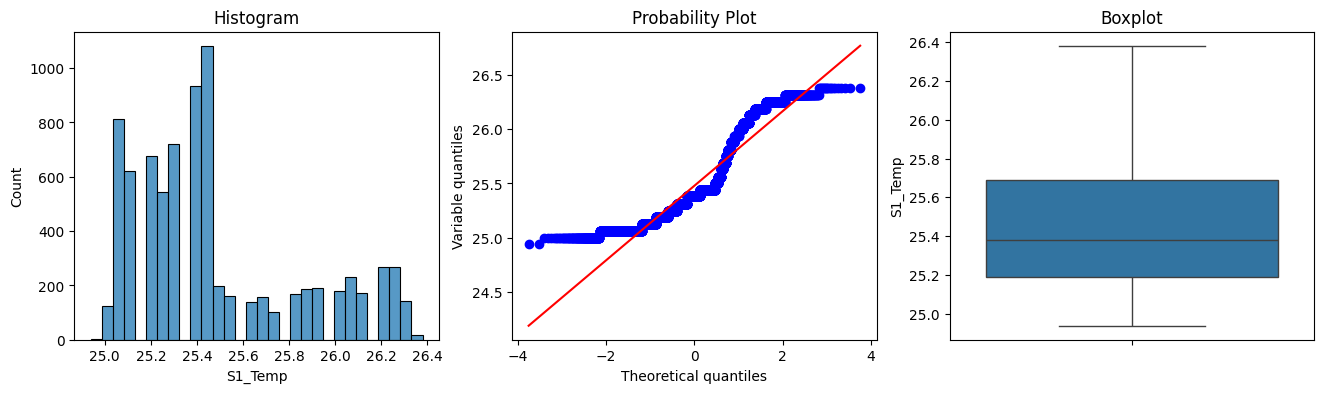

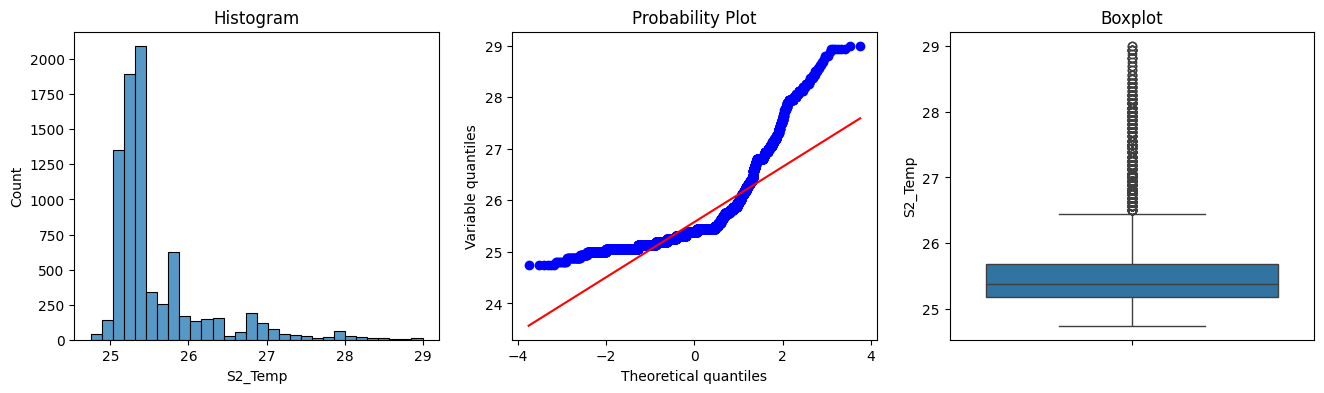

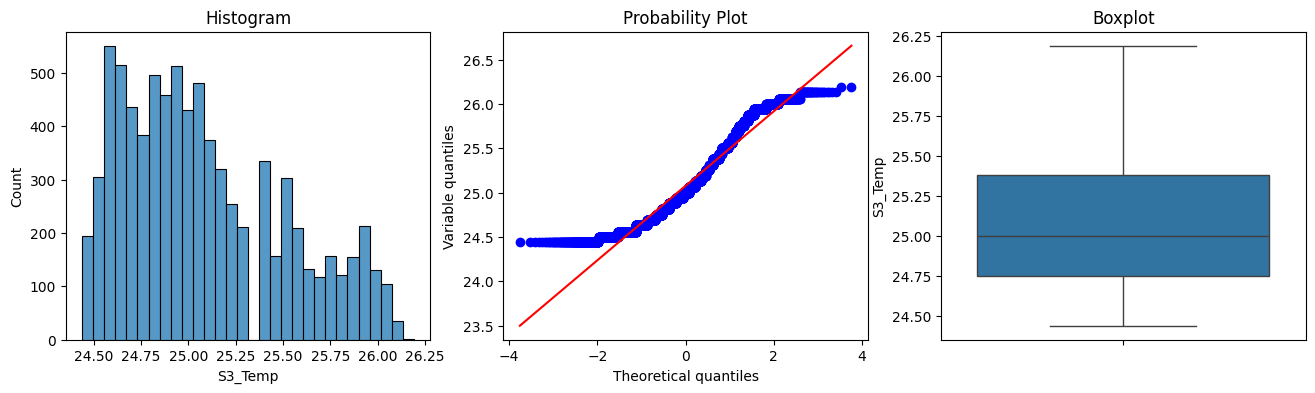

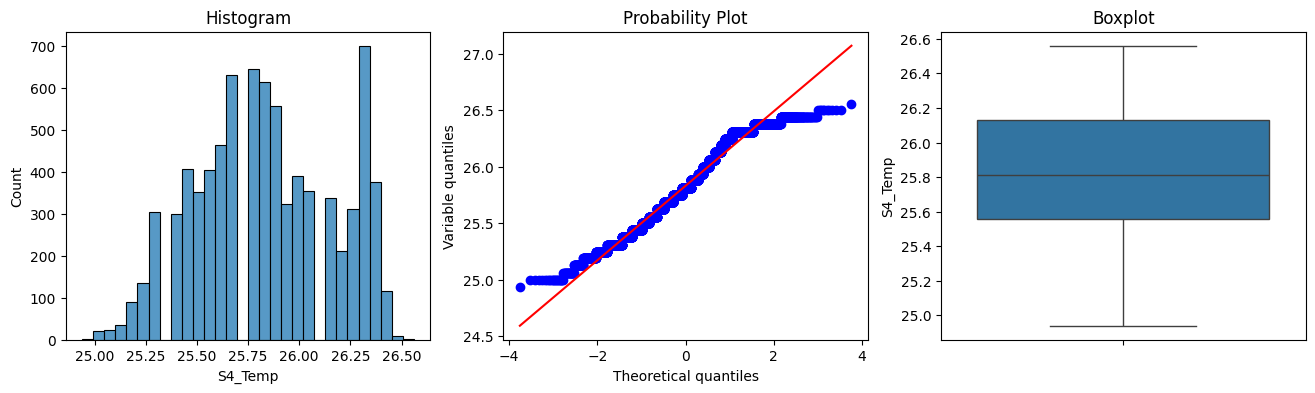

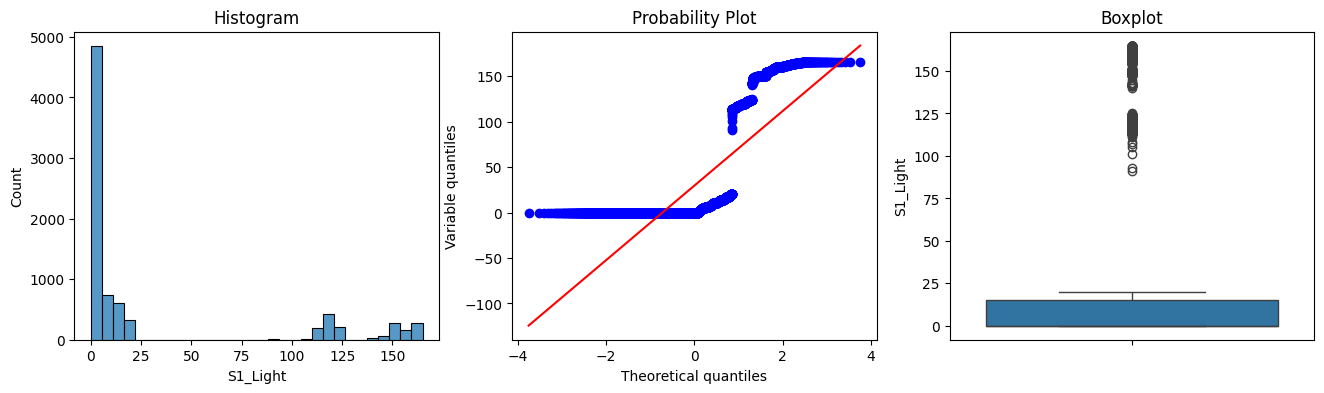

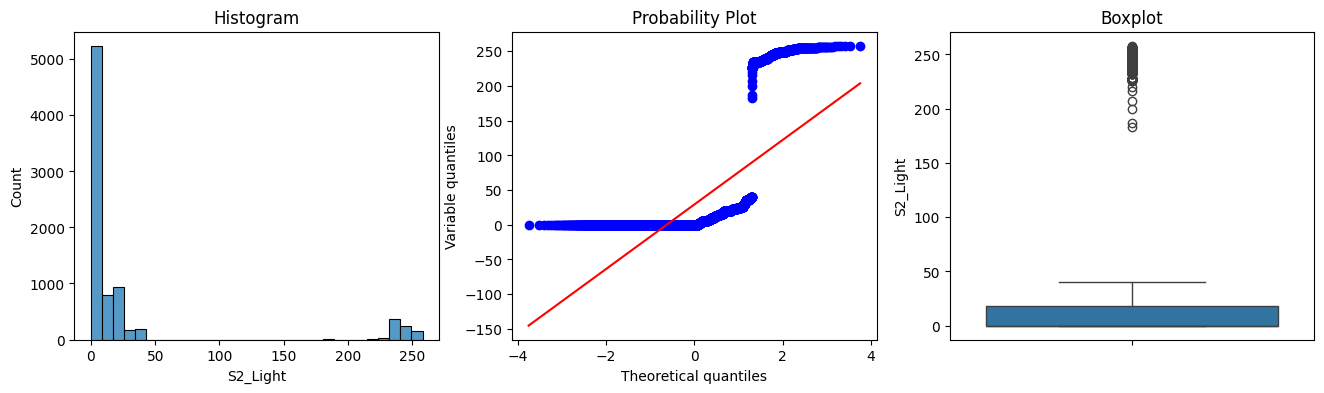

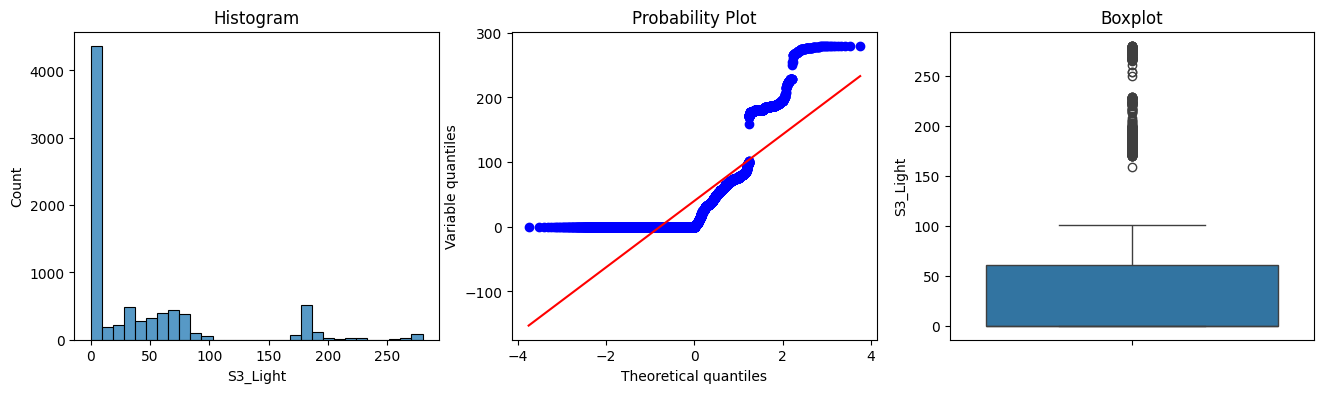

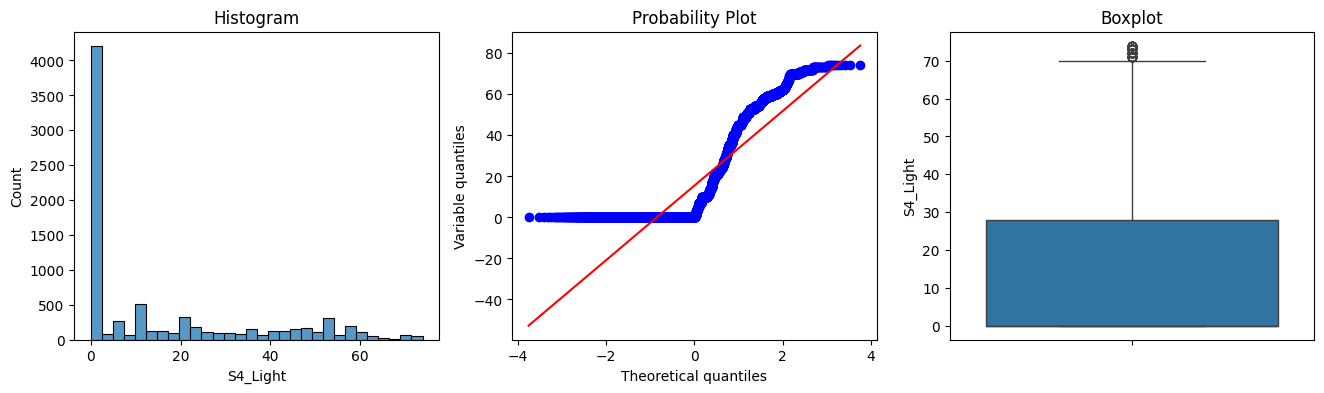

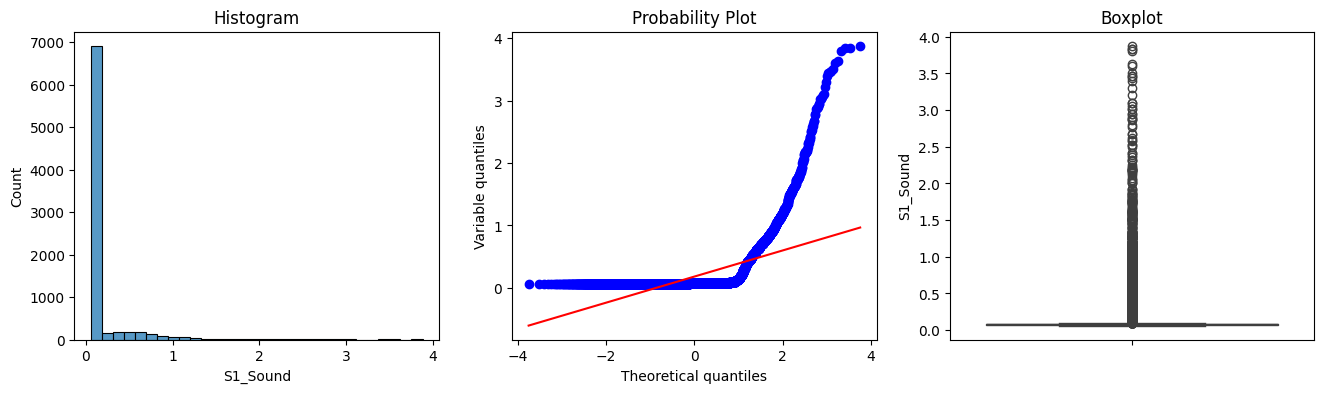

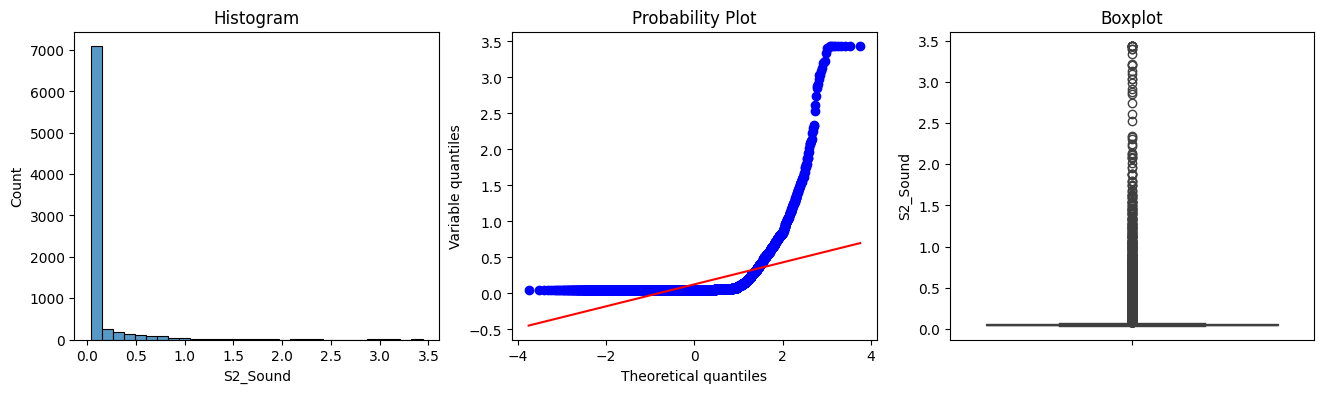

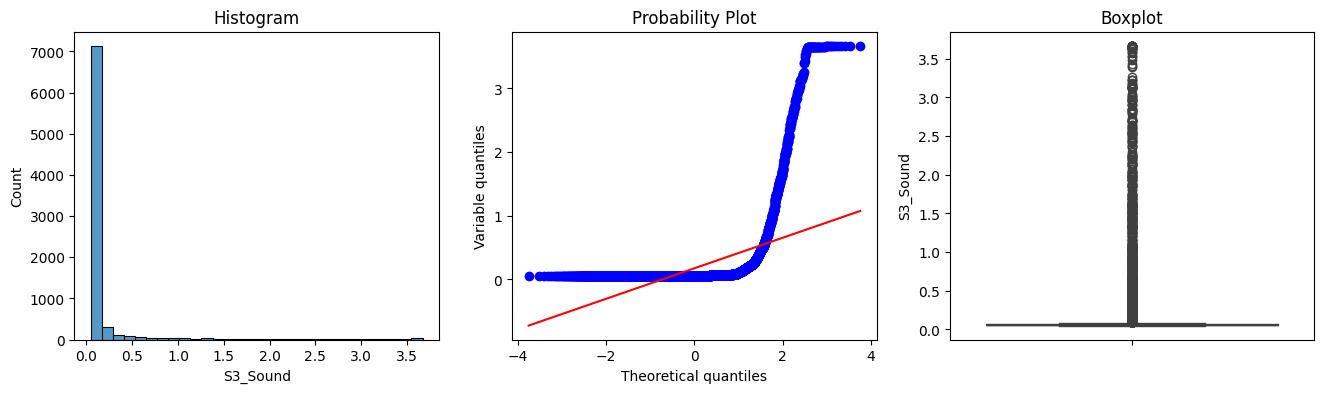

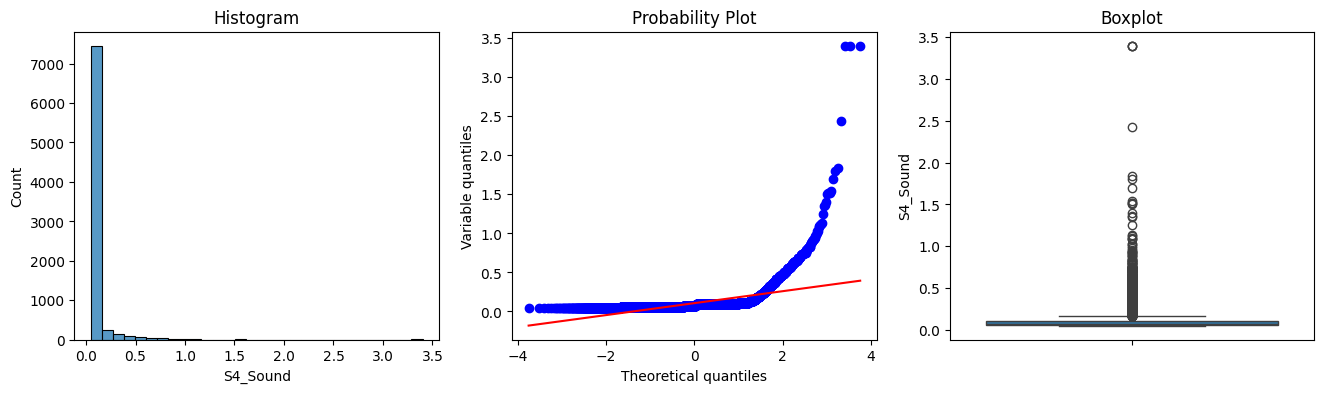

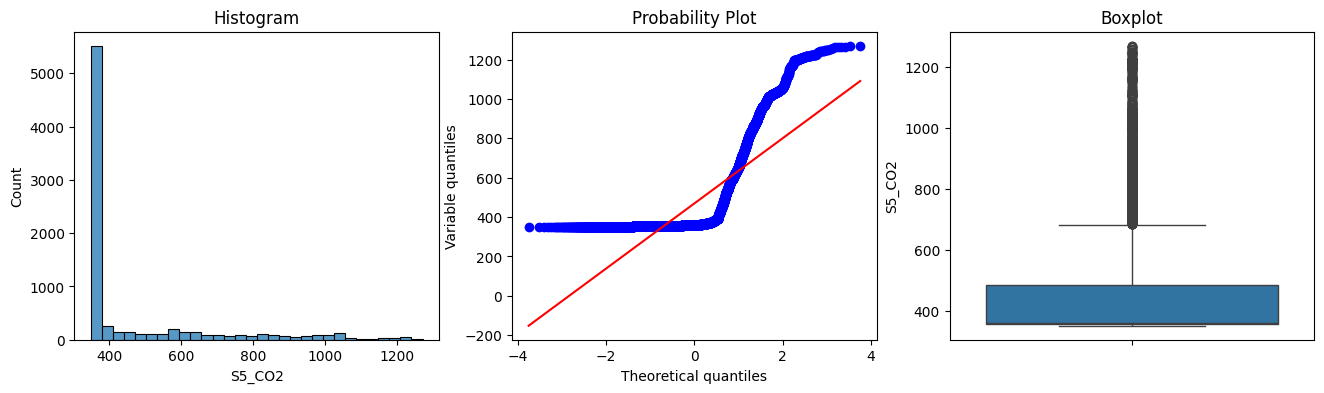

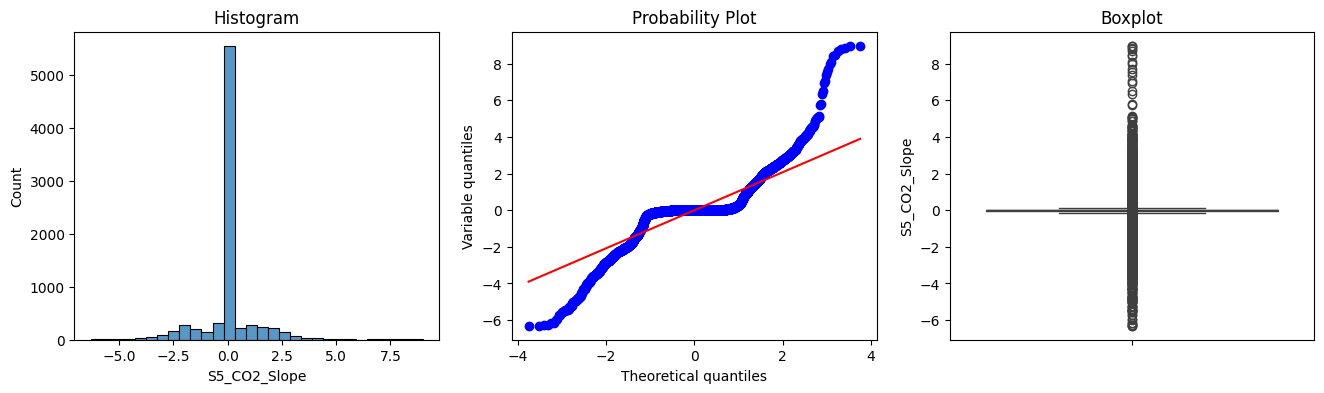

In [ ]:
for cc in numericals_train:
    check_plot(X_train, (cc))

Observasi:
- Seluruh kolom memiliki outlier kecuali pada `S1_Temp`, `S3_Temp` dan `S4_Temp`
- Nilai outlier yang terdeteksi merupakan nilai yang wajar, bukan merupakan nilai yang error
- Sehingga dipertimbangkan bahwa model yang digunakan nantinya adalah model yang robust terhadap outlier

## Data Distribution

In [ ]:
# Membuat fungsi data distribusi dalam visualisasi boxplot
def compare_boxplot_splits(df_full, df_train, df_test, fitur_list):
    """
    Menampilkan boxplot untuk setiap fitur, dibandingkan antar data full, train, val, test.
    """
    for fitur in fitur_list:
        # menggabungkan semua split menjadi satu dataframe
        df_plot = pd.DataFrame({
            'value': pd.concat([
                df_full[fitur],
                df_train[fitur],
                df_test[fitur]
            ], ignore_index=True),
            'split': (['full'] * len(df_full)) +
                     (['train'] * len(df_train)) +
                     (['test'] * len(df_test))
        })

        # plot boxplot
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='split', y='value', data=df_plot, palette='Set2')
        plt.title(f'Distribusi Fitur: {fitur}')
        plt.xlabel('Split')
        plt.ylabel(fitur)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




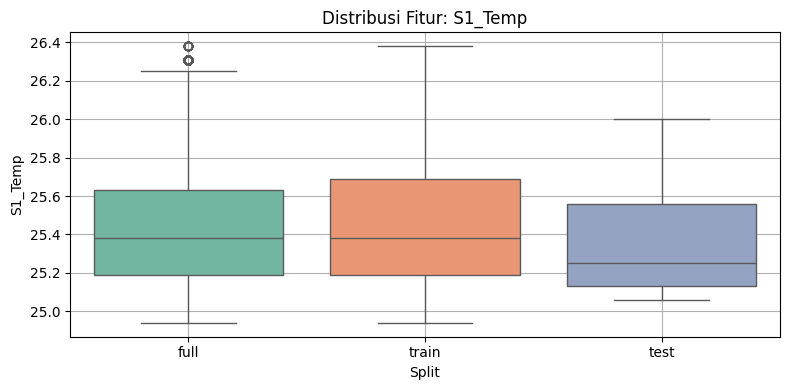

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




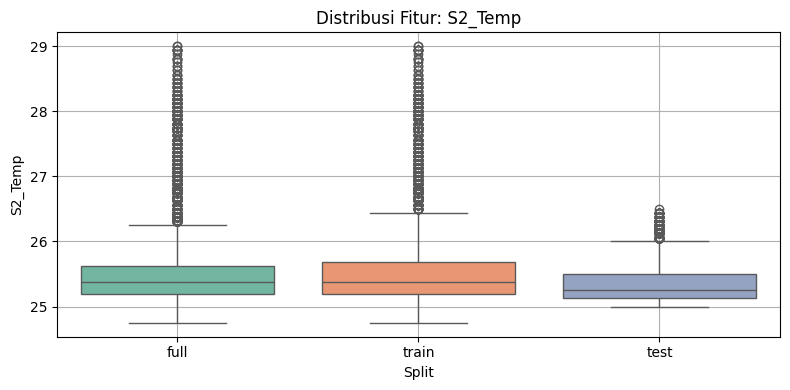

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




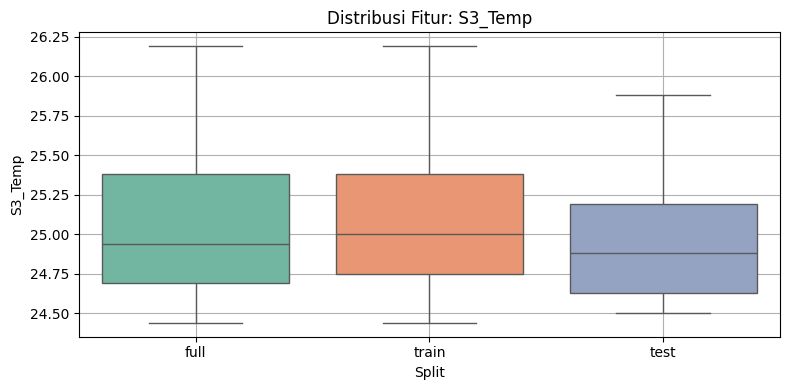

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




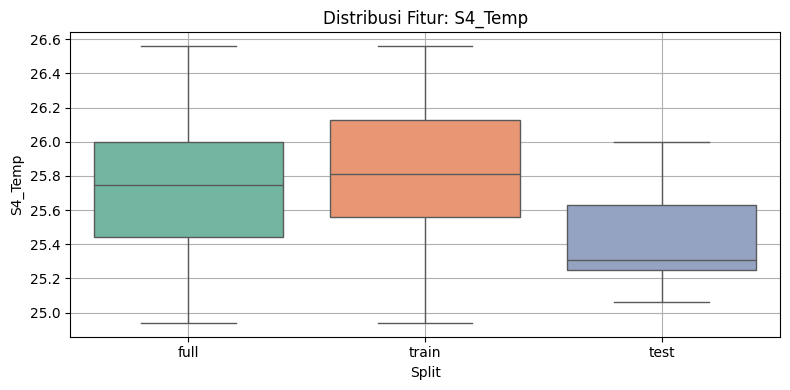

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




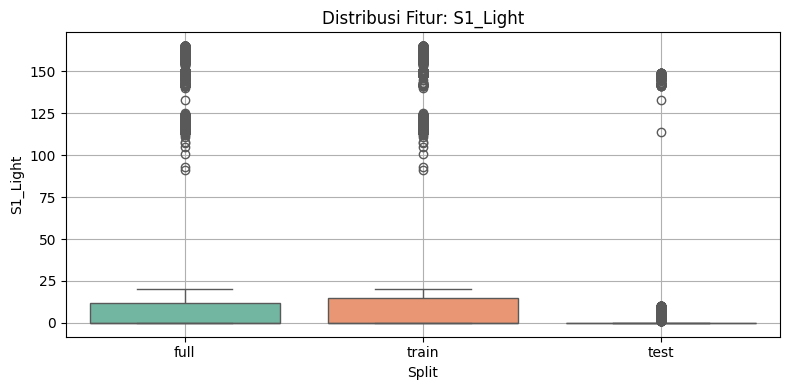

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




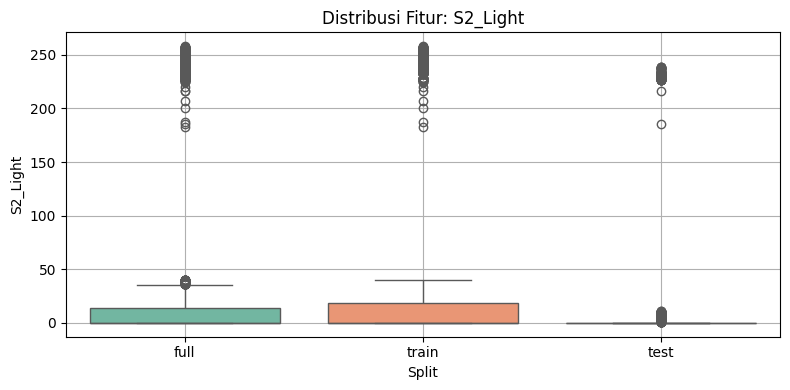

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




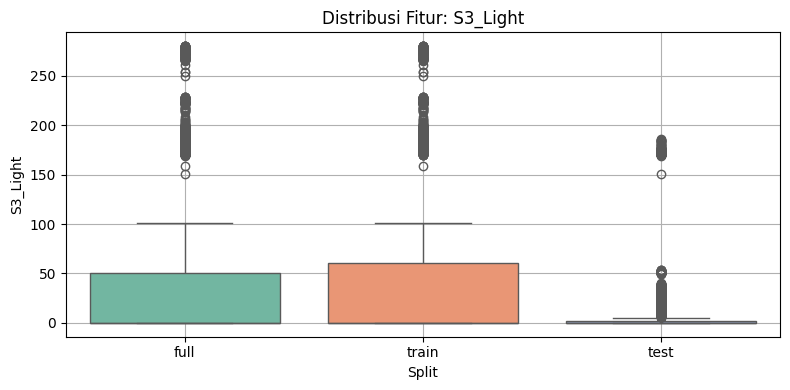

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




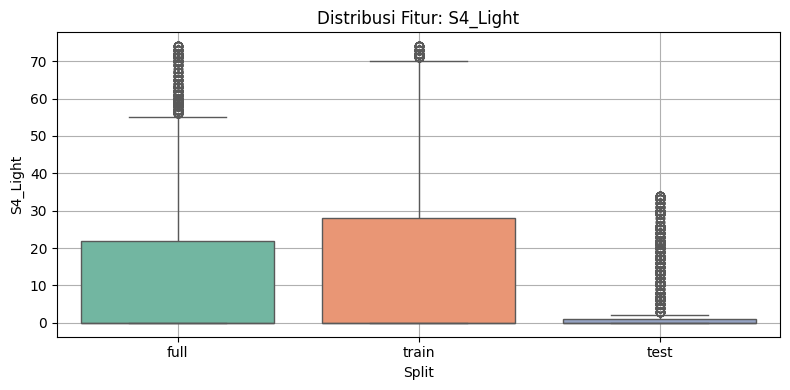

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




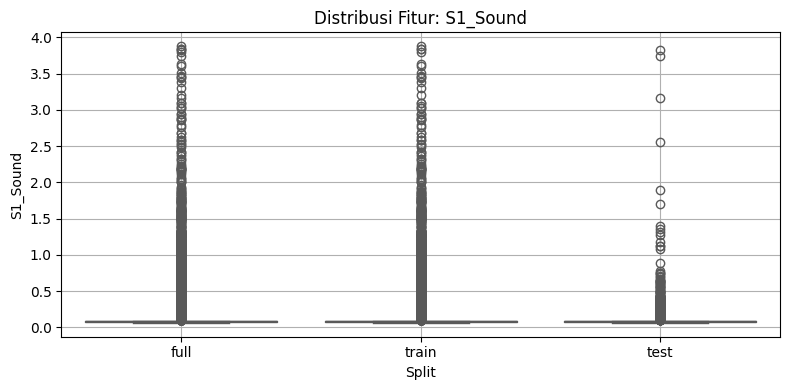

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




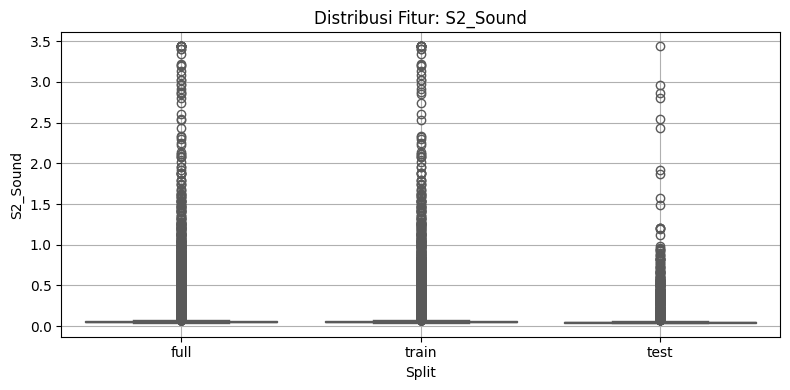

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




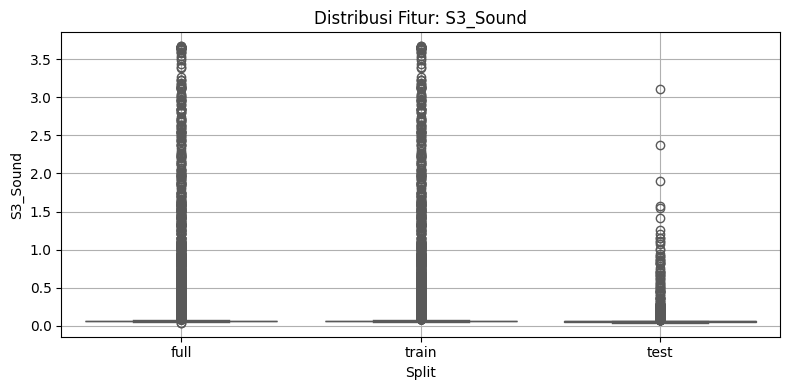

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




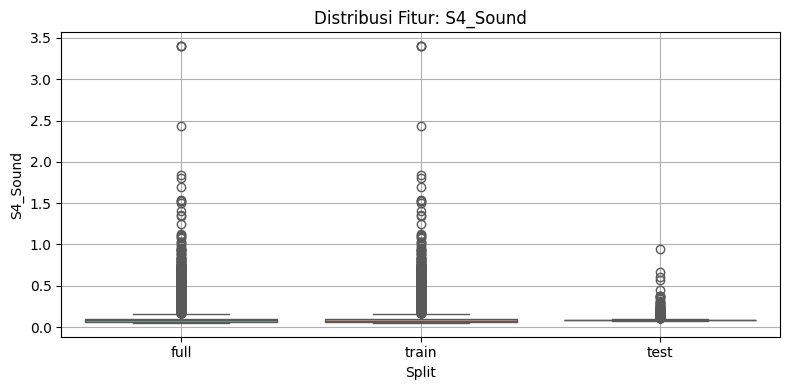

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




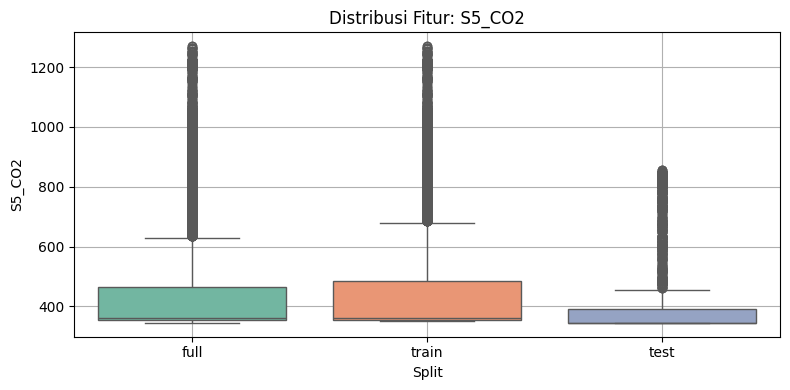

/tmp/ipython-input-59-3596198939.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




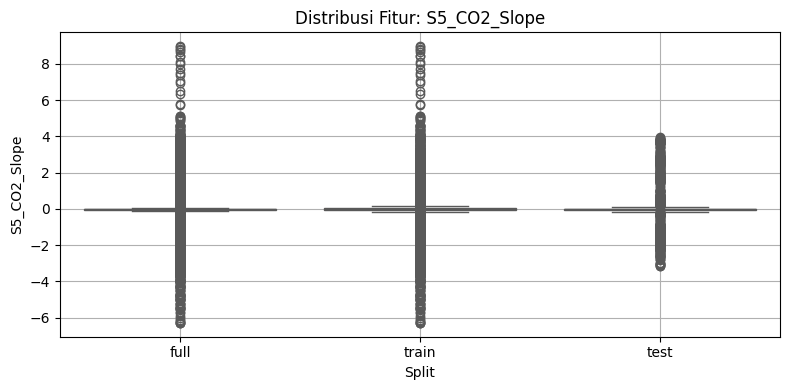

In [ ]:
compare_boxplot_splits(df_model, X_train, X_test, numericals_train )

In [ ]:
# Membuat fungsi perbandingan data distribusi menggunakan visualisasi histogram
def plot_kde_all_features(df_full, df_train, df_test, fitur_list):
    for fitur in fitur_list:
        plt.figure(figsize=(10, 5))

        sns.kdeplot(df_full[fitur], label='Full', color='gray', linewidth=2)
        sns.kdeplot(df_train[fitur], label='Train', color='blue')
        sns.kdeplot(df_test[fitur], label='Test', color='red')

        plt.title(f'Distribusi KDE: {fitur}')
        plt.xlabel(fitur)
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

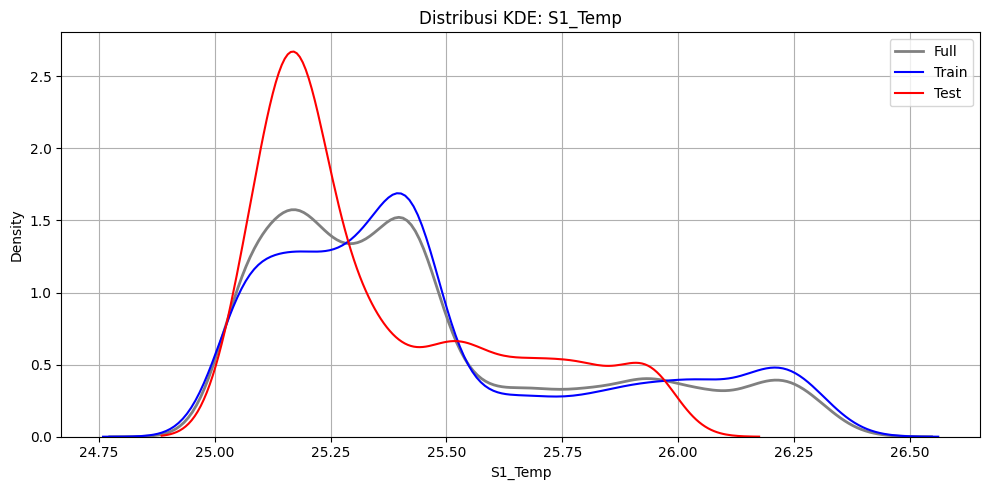

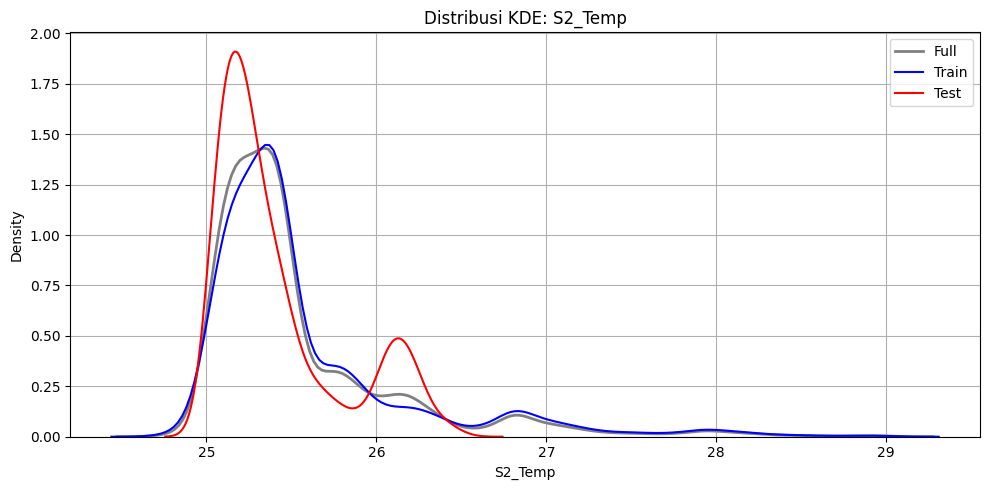

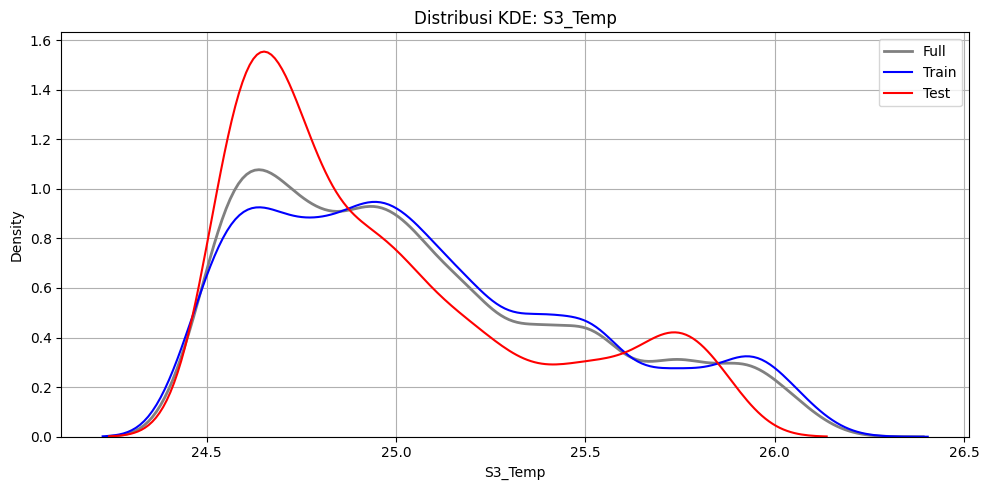

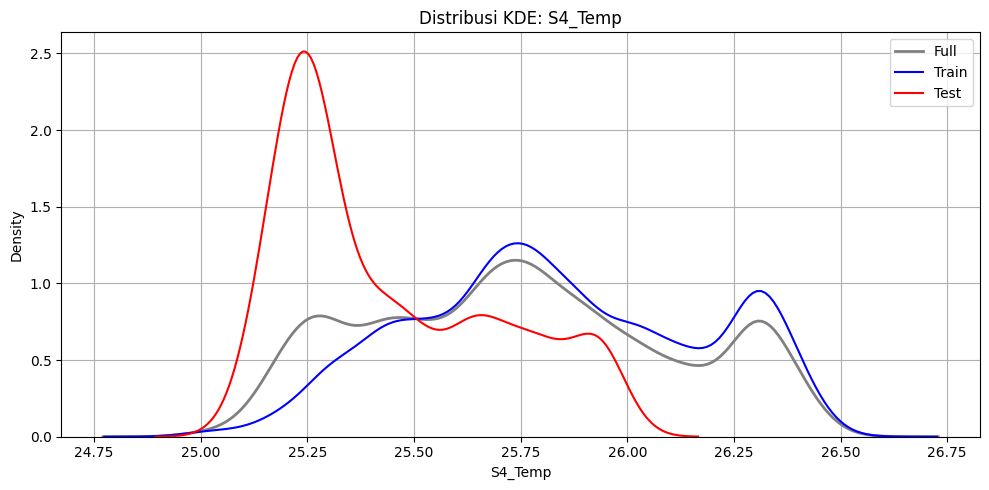

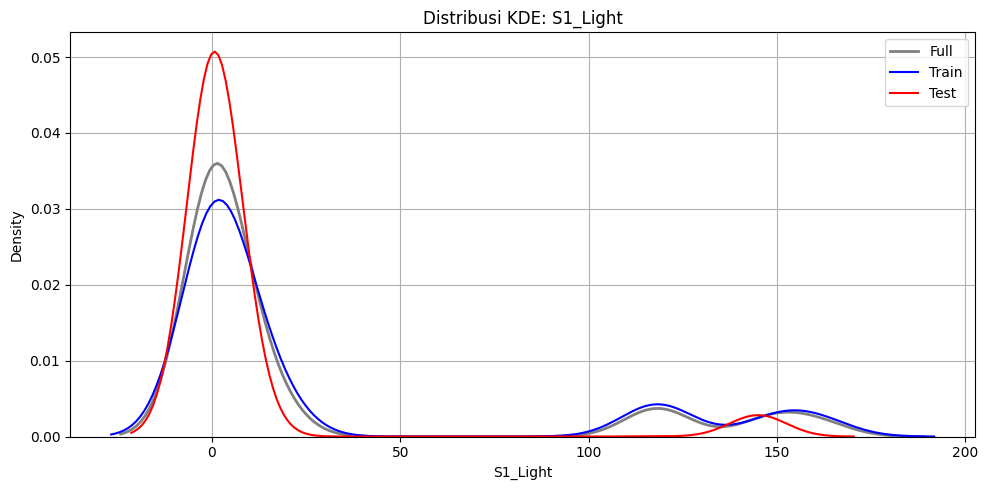

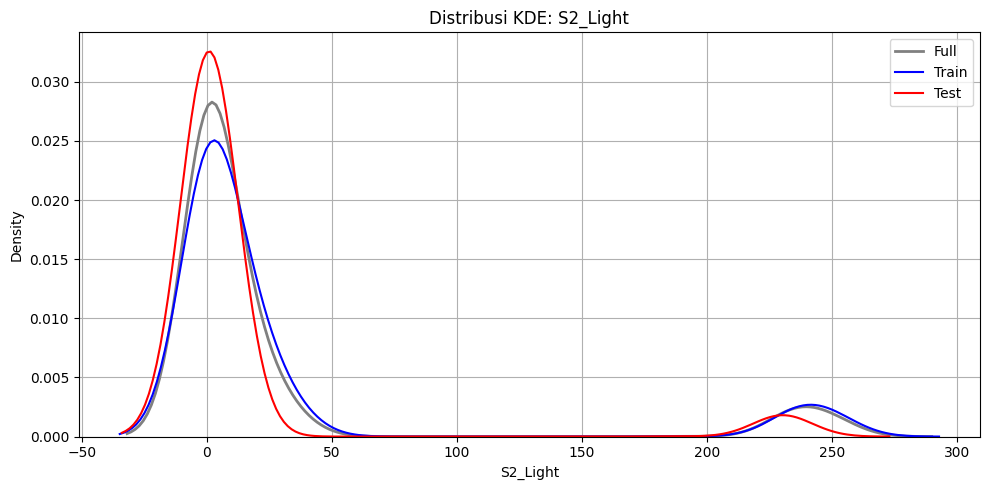

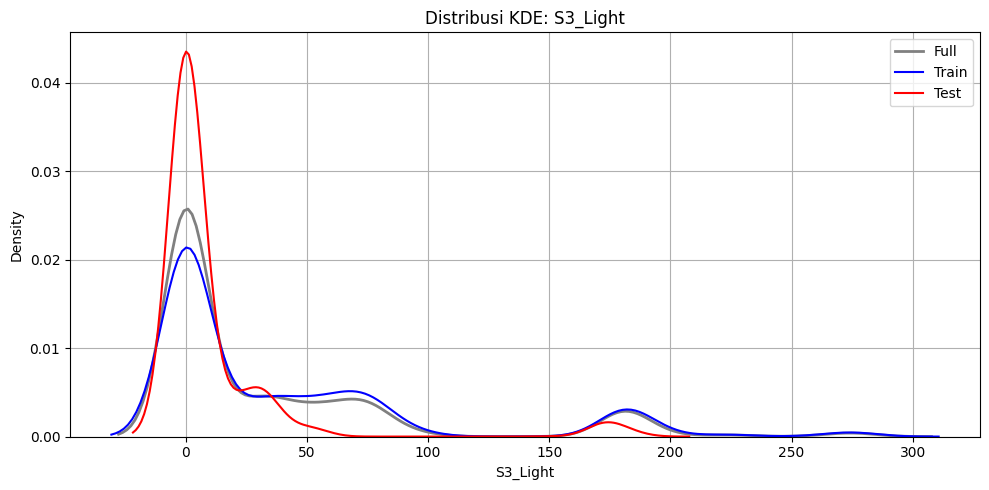

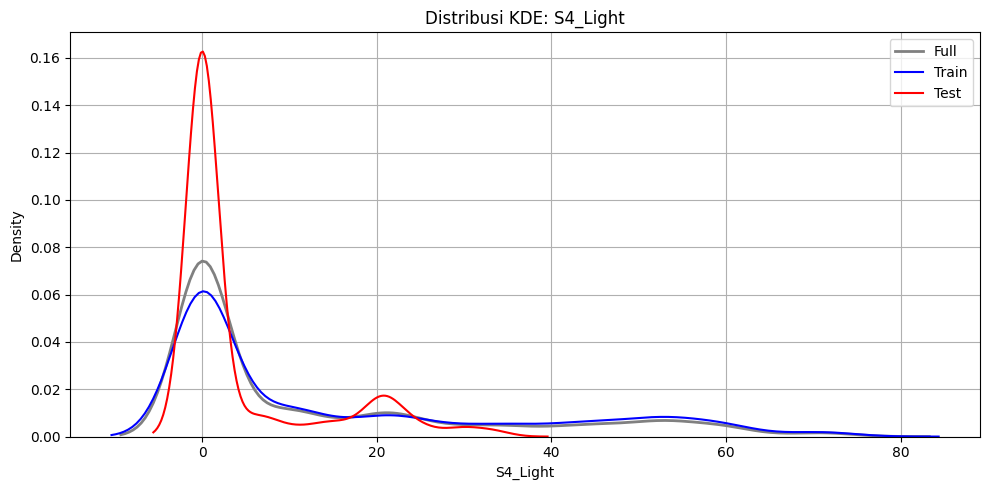

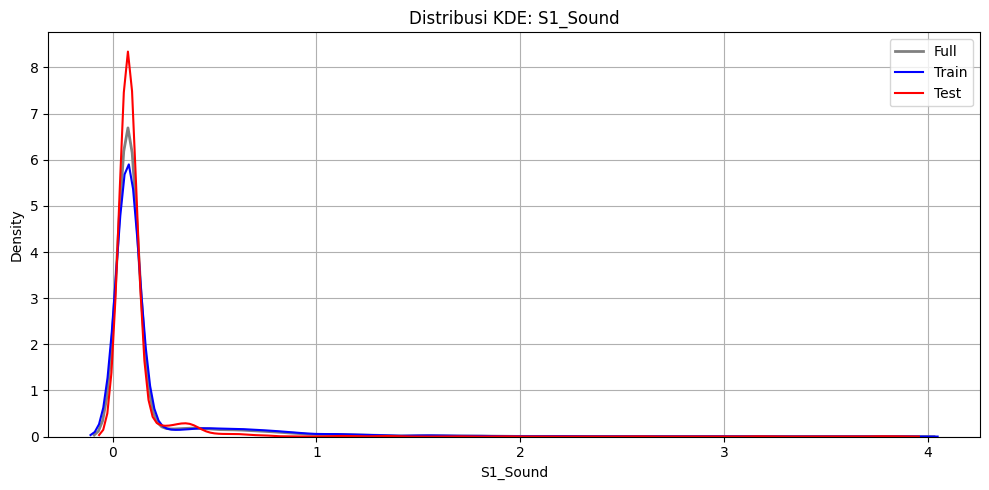

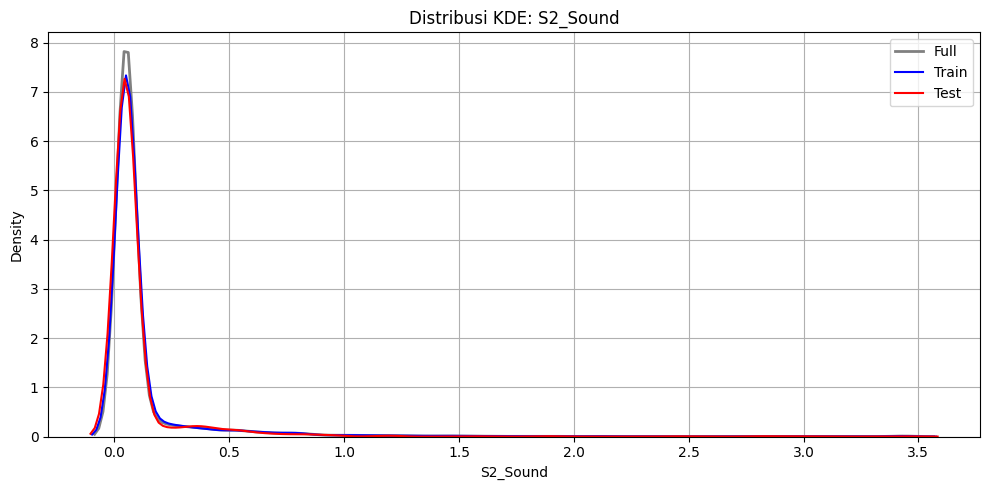

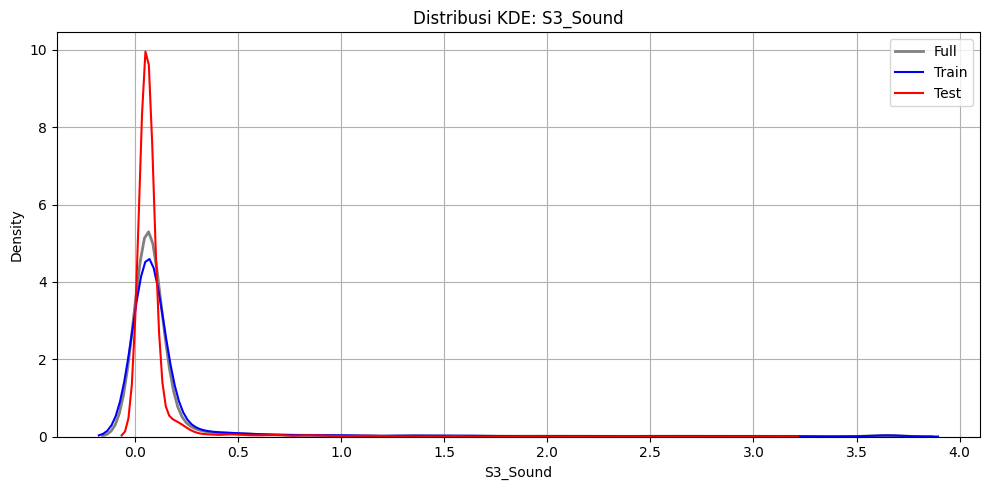

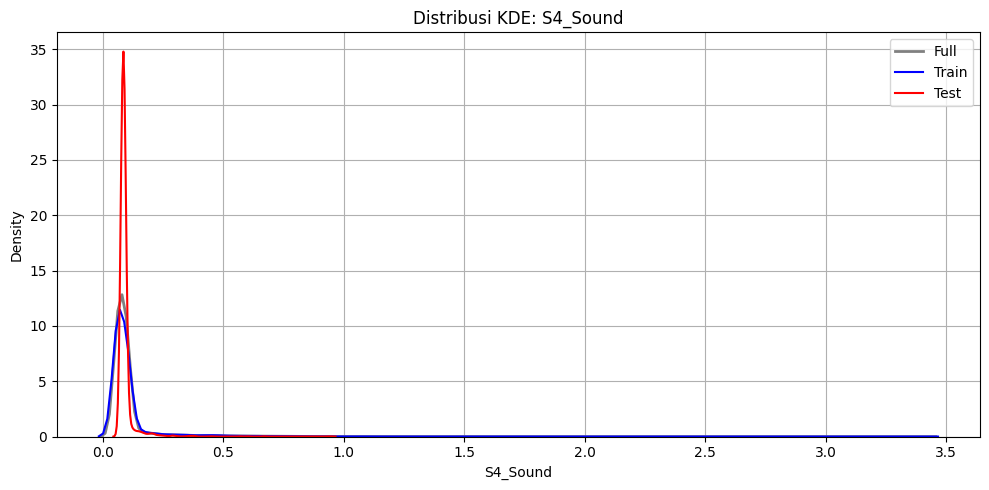

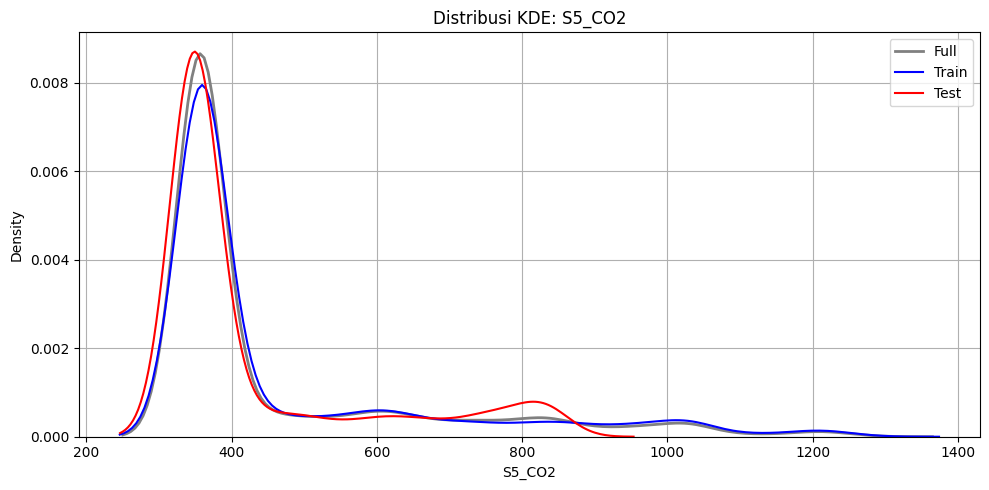

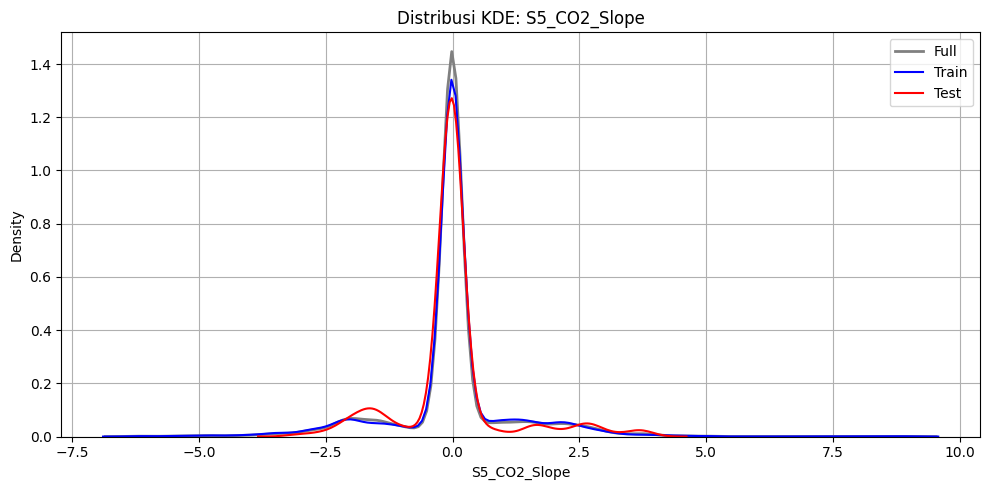

In [ ]:
plot_kde_all_features(df_model, X_train, X_test, numericals_train)

In [ ]:
# Membuat fungsi untuk melihat perbandingan distribusi data melalui visualisasi bar chart
def plot_categorical_distribution(df_train, df_test, categorical_columns):
    """
    Menampilkan bar plot distribusi kategori untuk train, test, dan full dataset.
    """
    df_full = pd.concat([df_train, df_test])

    for col in categorical_columns:
        plt.figure(figsize=(8, 5))

        train_dist = df_train[col].value_counts(normalize=True).sort_index() * 100
        test_dist = df_test[col].value_counts(normalize=True).sort_index() * 100
        full_dist = df_full[col].value_counts(normalize=True).sort_index() * 100

        distribusi = pd.DataFrame({
            'Train': train_dist,
            'Test': test_dist,
            'Full': full_dist
        }).fillna(0).sort_index()

        distribusi.plot(kind='bar', width=0.8)
        plt.title(f"Distribusi Kategori - {col}")
        plt.ylabel("Persentase (%)")
        plt.xlabel("Kategori")
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


<Figure size 800x500 with 0 Axes>

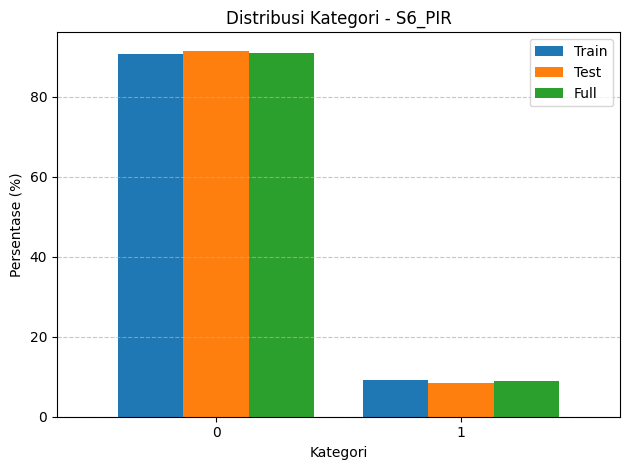

<Figure size 800x500 with 0 Axes>

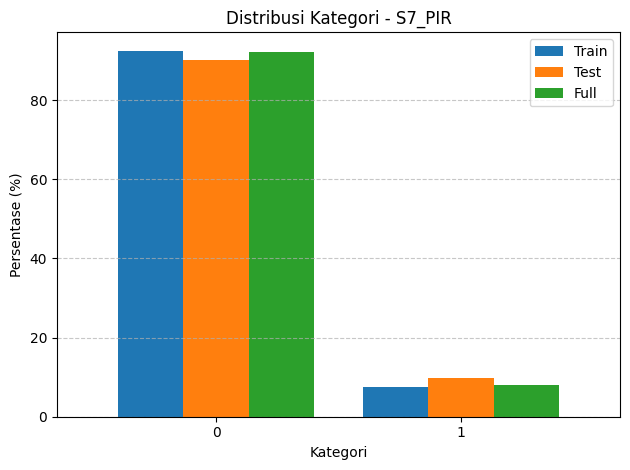

In [ ]:
plot_categorical_distribution(X_train, X_test, categoricals_train)

<Figure size 800x500 with 0 Axes>

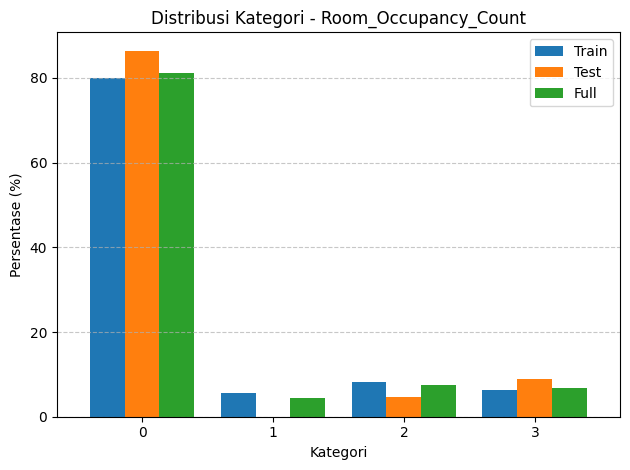

In [ ]:
plot_categorical_distribution(
    y_train.to_frame(name='Room_Occupancy_Count'),
    y_test.to_frame(name='Room_Occupancy_Count'),
    ['Room_Occupancy_Count']
)

In [ ]:
# Membuat fungsi untuk melihat perbandingan distribusi data melalui tabel persentase
def show_categorical_distribution(df_train, df_test, categorical_columns):
    df_full = pd.concat([df_train, df_test])

    all_tables = {}

    for col in categorical_columns:
        train_dist = df_train[col].value_counts(normalize=True).sort_index() * 100
        test_dist = df_test[col].value_counts(normalize=True).sort_index() * 100
        full_dist = df_full[col].value_counts(normalize=True).sort_index() * 100

        distribusi = pd.DataFrame({
            'Train (%)': train_dist,
            'Test (%)': test_dist,
            'Full (%)': full_dist
        }).fillna(0).round(2)

        print(f"\n=== Distribusi Kategori: {col} ===")
        display(distribusi)  # untuk notebook / Jupyter
        all_tables[col] = distribusi

    return all_tables


In [ ]:
show_categorical_distribution(X_train, X_test, categoricals_train)


=== Distribusi Kategori: S6_PIR ===


Train (%)  Test (%)  Full (%)
S6_PIR                               
0           90.84     91.56     90.99
1            9.16      8.44      9.01


=== Distribusi Kategori: S7_PIR ===


Train (%)  Test (%)  Full (%)
S7_PIR                               
0            92.5     90.23     92.04
1             7.5      9.77      7.96

{'S6_PIR':         Train (%)  Test (%)  Full (%)
 S6_PIR                               
 0           90.84     91.56     90.99
 1            9.16      8.44      9.01,
 'S7_PIR':         Train (%)  Test (%)  Full (%)
 S7_PIR                               
 0            92.5     90.23     92.04
 1             7.5      9.77      7.96}

In [ ]:
show_categorical_distribution(
    y_train.to_frame(name='Room_Occupancy_Count'),
    y_test.to_frame(name='Room_Occupancy_Count'),
    ['Room_Occupancy_Count']
)


=== Distribusi Kategori: Room_Occupancy_Count ===


Train (%)  Test (%)  Full (%)
Room_Occupancy_Count                               
0                         79.93     86.43     81.23
1                          5.66      0.00      4.53
2                          8.08      4.59      7.38
3                          6.32      8.98      6.85

{'Room_Occupancy_Count':                       Train (%)  Test (%)  Full (%)
 Room_Occupancy_Count                               
 0                         79.93     86.43     81.23
 1                          5.66      0.00      4.53
 2                          8.08      4.59      7.38
 3                          6.32      8.98      6.85}

Observasi:
- Pengecekan distribusi data dilakukan setelah proses split apakah masing-masing data yaitu train dan test memiliki representasi yang adil
- Pengecekan fitur numerik dilakukan dengan visualisasi boxplot dan histogram. Sebaran data pada data train cenderung bervariasi dibandingkan data test sehingga berpotensi overfitting, dimana model perform lebih baik pada data train
- Sementara fitur kategori dilakukan pengecekan dengan visualisasi bar chart. Masing-masing nilai tersebar dengan baik, perbedaan persentase pada data train dan test tidak signifikan

## Exploratory Data Analysis

### Numericals Data Analysis

#### Statistical Descriptive

In [ ]:
X_train[numericals_train].describe()

S1_Temp      S2_Temp      S3_Temp      S4_Temp    S1_Light  \
count  8103.000000  8103.000000  8103.000000  8103.000000  8103.00000   
mean     25.478676    25.579422    25.077793    25.832711    29.61323   
std       0.365328     0.624414     0.432684     0.334422    53.84893   
min      24.940000    24.750000    24.440000    24.940000     0.00000   
25%      25.190000    25.190000    24.750000    25.560000     0.00000   
50%      25.380000    25.380000    25.000000    25.810000     0.00000   
75%      25.690000    25.690000    25.380000    26.130000    15.00000   
max      26.380000    29.000000    26.190000    26.560000   165.00000   

          S2_Light     S3_Light     S4_Light     S1_Sound     S2_Sound  \
count  8103.000000  8103.000000  8103.000000  8103.000000  8103.000000   
mean     29.152660    40.004936    15.456991     0.181685     0.124954   
std      70.276549    61.818694    20.908455     0.339379     0.276701   
min       0.000000     0.000000     0.000000     0.060000     0.040000   
25%       0.000000     0.000000     0.000000     0.070000     0.050000   
50%       0.000000     0.000000     0.000000     0.080000     0.050000   
75%      18.500000    61.000000    28.000000     0.080000     0.060000   
max     258.000000   280.000000    74.000000     3.880000     3.440000   

          S3_Sound     S4_Sound       S5_CO2  S5_CO2_Slope  
count  8103.000000  8103.000000  8103.000000   8103.000000  
mean      0.175391     0.106647   469.516846     -0.003256  
std       0.453885     0.133328   209.646787      1.199047  
min       0.050000     0.050000   350.000000     -6.296154  
25%       0.060000     0.060000   355.000000     -0.046154  
50%       0.060000     0.070000   360.000000      0.000000  
75%       0.070000     0.100000   485.000000      0.026923  
max       3.670000     3.400000  1270.000000      8.980769

#### Numericals Data Distribution: Histogram

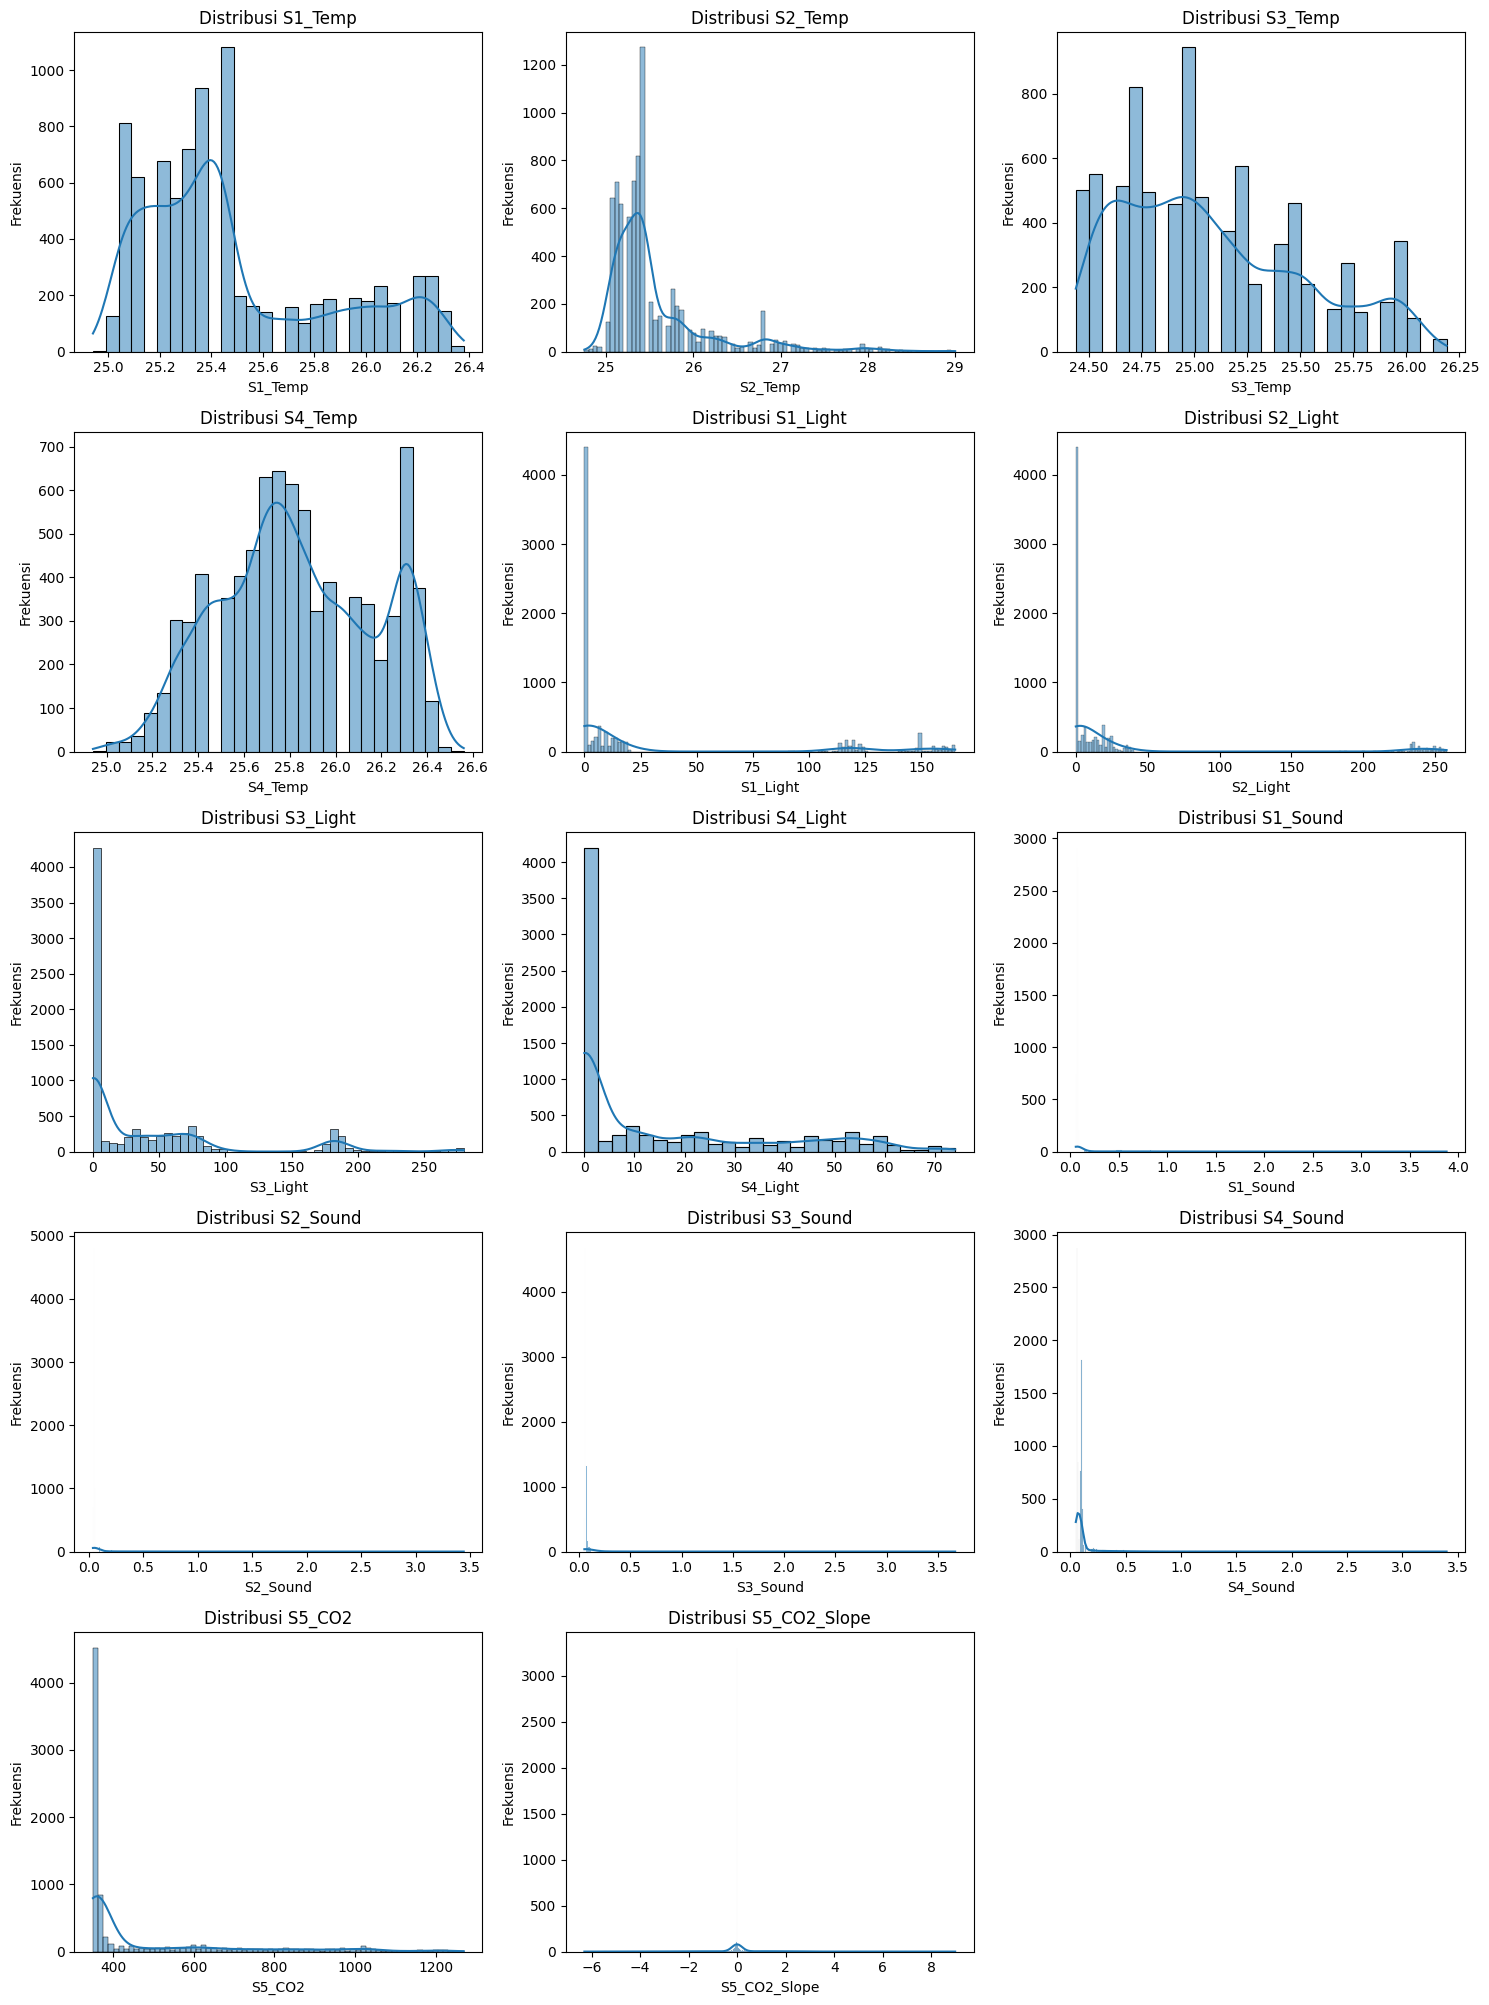

In [ ]:
# ukuran grid

# jumlah kolom per baris
n_cols = 3
n_rows = -(-len(X_train[numericals_train]) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# looping tiap kolom numerik
for i, col in enumerate(X_train[numericals_train], 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

#### Correlation: Pearson

<Axes: title={'center': 'Pearson Correlation'}>

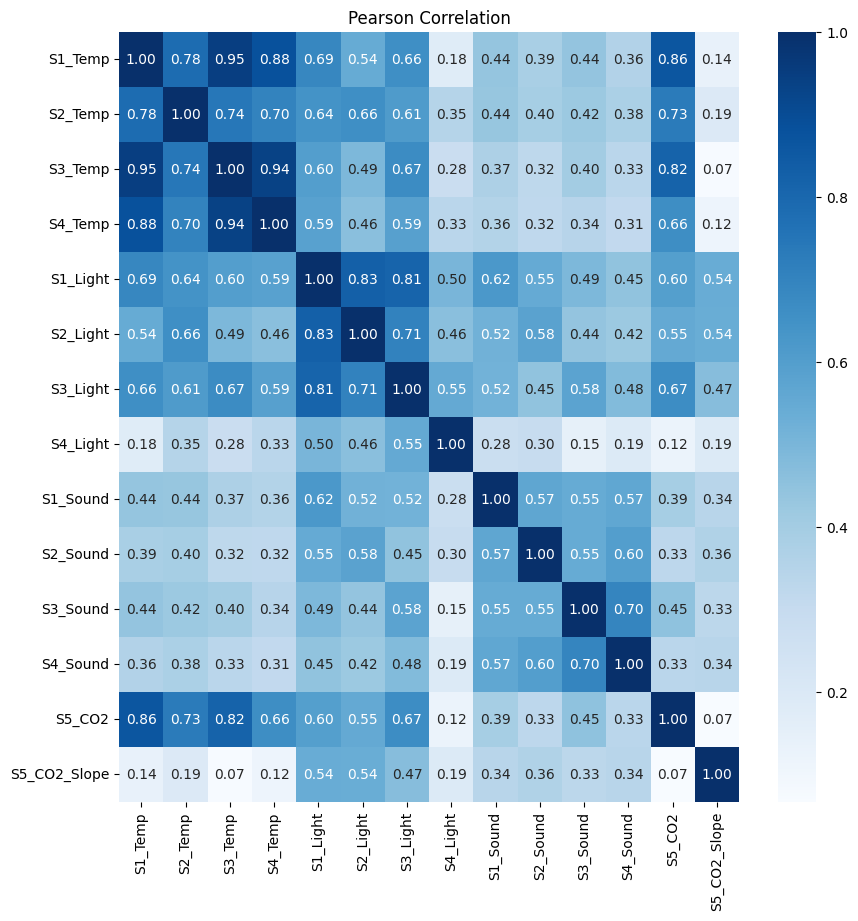

In [ ]:
# Image size
plt.figure(figsize=(10,10))
plt.title("Pearson Correlation")

# Correlation variable
# For numerical only
correlation = X_train[numericals_train].corr()

# Syntax for correlation heatmap
sns.heatmap(correlation, annot=True, fmt='.2f', cmap="Blues")

#### Correlation: Spearman

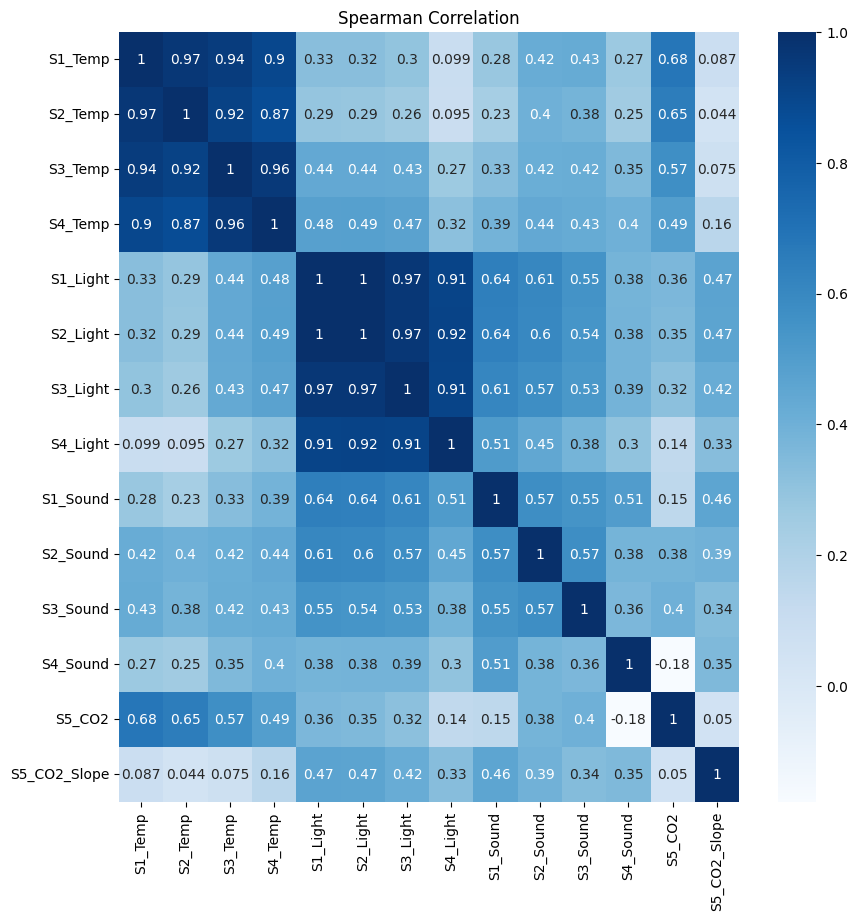

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(X_train[numericals_train].corr(method='spearman'), cmap='Blues', annot=True)
plt.title("Spearman Correlation")
plt.show()

#### Correlation: Visualize with Scatterplot

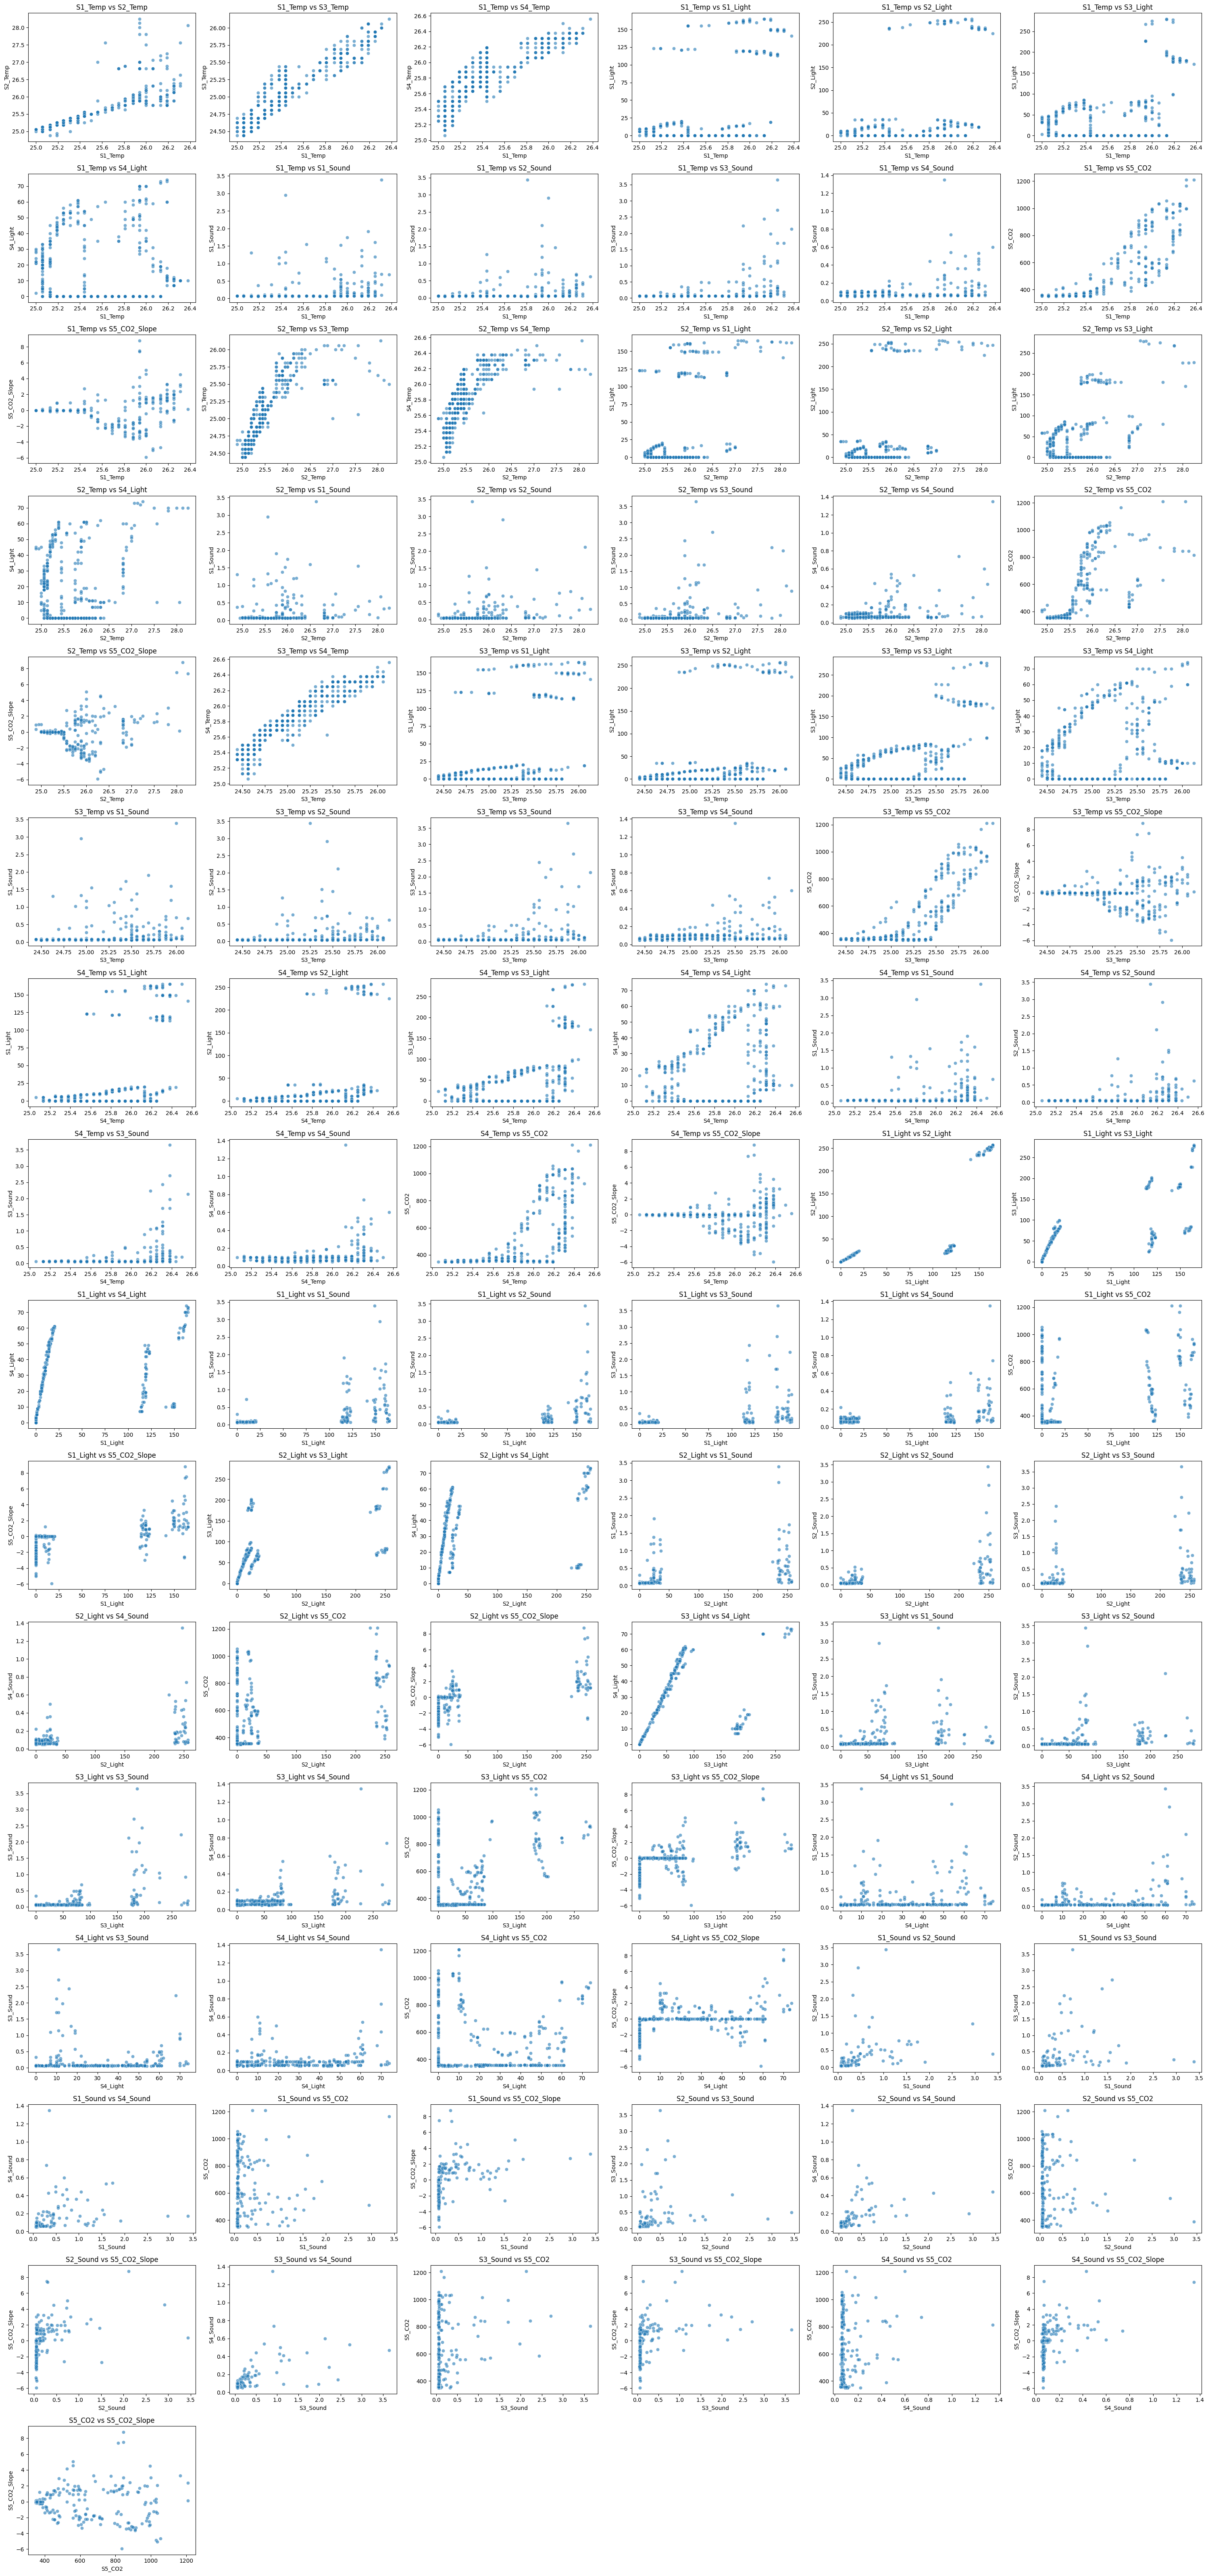

In [ ]:
from itertools import combinations
# membuat seluruh pasangan kombinasi 2 kolom
pairs = list(combinations(X_train[numericals_train], 2))

# grid plot
n_cols = 6
n_rows = -(-len(pairs) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, (x_col, y_col) in enumerate(pairs, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=X_train.sample(500, random_state=42), x=x_col, y=y_col, alpha=0.6)
    plt.title(f'{x_col} vs {y_col}')

plt.tight_layout()
plt.show()

Observasi:
- Hampir seluruh fitur numerik memiliki pola distribusi yang skew karena terpengaruh oleh outlier
- Korelasi dilihat melalui 3 metode yaitu Pearson Correlation, Spearman Correlation, dan Scatter plot.
- Beberapa fitur yang memiliki nilai korelasi Pearson yang tinggi tidak memiliki nilai korelasi Spearman yang tinggi. Hal ini menjadi Pearson yang cenderung kurang dipercaya hasilnya karena dihitung dengan data yang masih memiliki outlier. Sehingga korelasi fokus melihat pada Spearman yang bersifat robust karena memperhatikan kekuatan korelasi berdasarkan urutan.
- Fitur suara dan temperatur yang dipasangkan dengan fitur yang sama namun dengan lokasi yang berbeda menunjukkan pada korelasi Spearman memiliki korelasi yang sangat tinggi yaitu di atas 0.8
- Berdasarkan kondisi yang diterangkan sebelumnya, maka model yang nantinya akan dibangun adalah model yang tidak membutuhkan asumsi korelasi yang linear karena pertimbangan nilai outlier yang tetap akan dipertahankan sesuai rupa aslinya

### Categoricals Data Analysis

In [ ]:
y_train.value_counts()

Room_Occupancy_Count
0    6477
2     655
3     512
1     459
Name: count, dtype: int64

/tmp/ipython-input-28-3469598381.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='S6_PIR', data=X_train, palette='Blues')


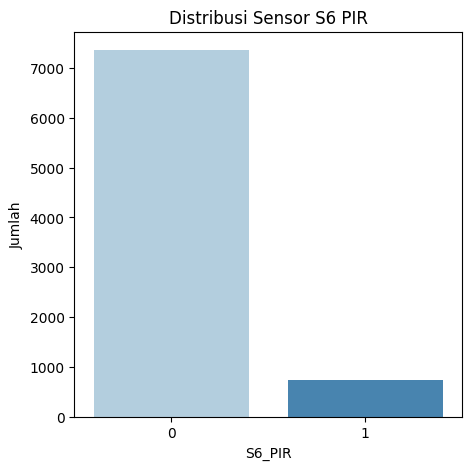

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='S6_PIR', data=X_train, palette='Blues')
plt.title('Distribusi Sensor S6 PIR')
plt.ylabel('Jumlah')
plt.xlabel('S6_PIR')
plt.show()

/tmp/ipython-input-29-4063667765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='S7_PIR', data=X_train, palette='Blues')


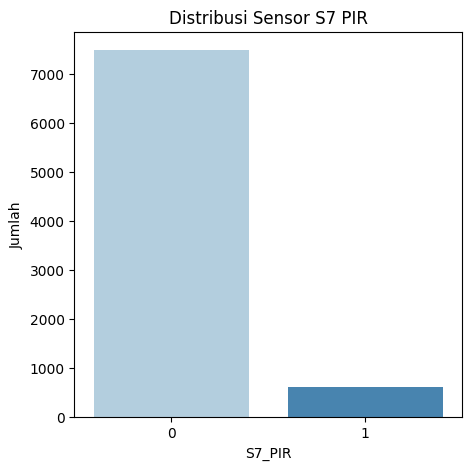

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='S7_PIR', data=X_train, palette='Blues')
plt.title('Distribusi Sensor S7 PIR')
plt.ylabel('Jumlah')
plt.xlabel('S7_PIR')
plt.show()

Observasi:
- Pada data train, kolom `Room_Occupancy_Count` yang menjadi target tersedia nilai yang lengkap, seluruh nilai unik yaitu 0,1,2, dan 3 hadir dan didominasi tercatat oleh nilai 0 sebesar 6.477 baris
- Jumlah masing-masing nilai unik sangat timpang, nilai 0 sebesar 6.477 baris namun nilai yang lainnya hanya berkisar 400-an hingga 600-an baris. Perbedaan yang signifikan mengindikasikan bahwa data terdeteksi imbalance sehingga perlu dilakukan beberapa eksperimen untuk menemukan performa terbaik. Apakah dihandle dengan resample atau tanpa resample, sehingga hanya cukup diatur dengan pengaturan class weight balance pada model
- Distribusi nilai pada sensor gerak yaitu S6_PIR dan S7_PIR menunjukkan nilai yang diperoleh sangat tidak seimbang. Nilai 0 lebih banyak tercatat yaitu di atas 7.000 sementara nilai 1 di bawah 1.000 baris. Perbedaan yang signifikan cenderung membuat model belajar banyak pada kelas mayoritas dan memberikan potensi overfitting jika menggunakan model yang sangat kompleks

### Occupation Count Analysis

#### Numericals Data

/tmp/ipython-input-30-597757099.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-30-597757099.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-30-597757099.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-30-597757099.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-30-597757099.py:23: FutureWarning

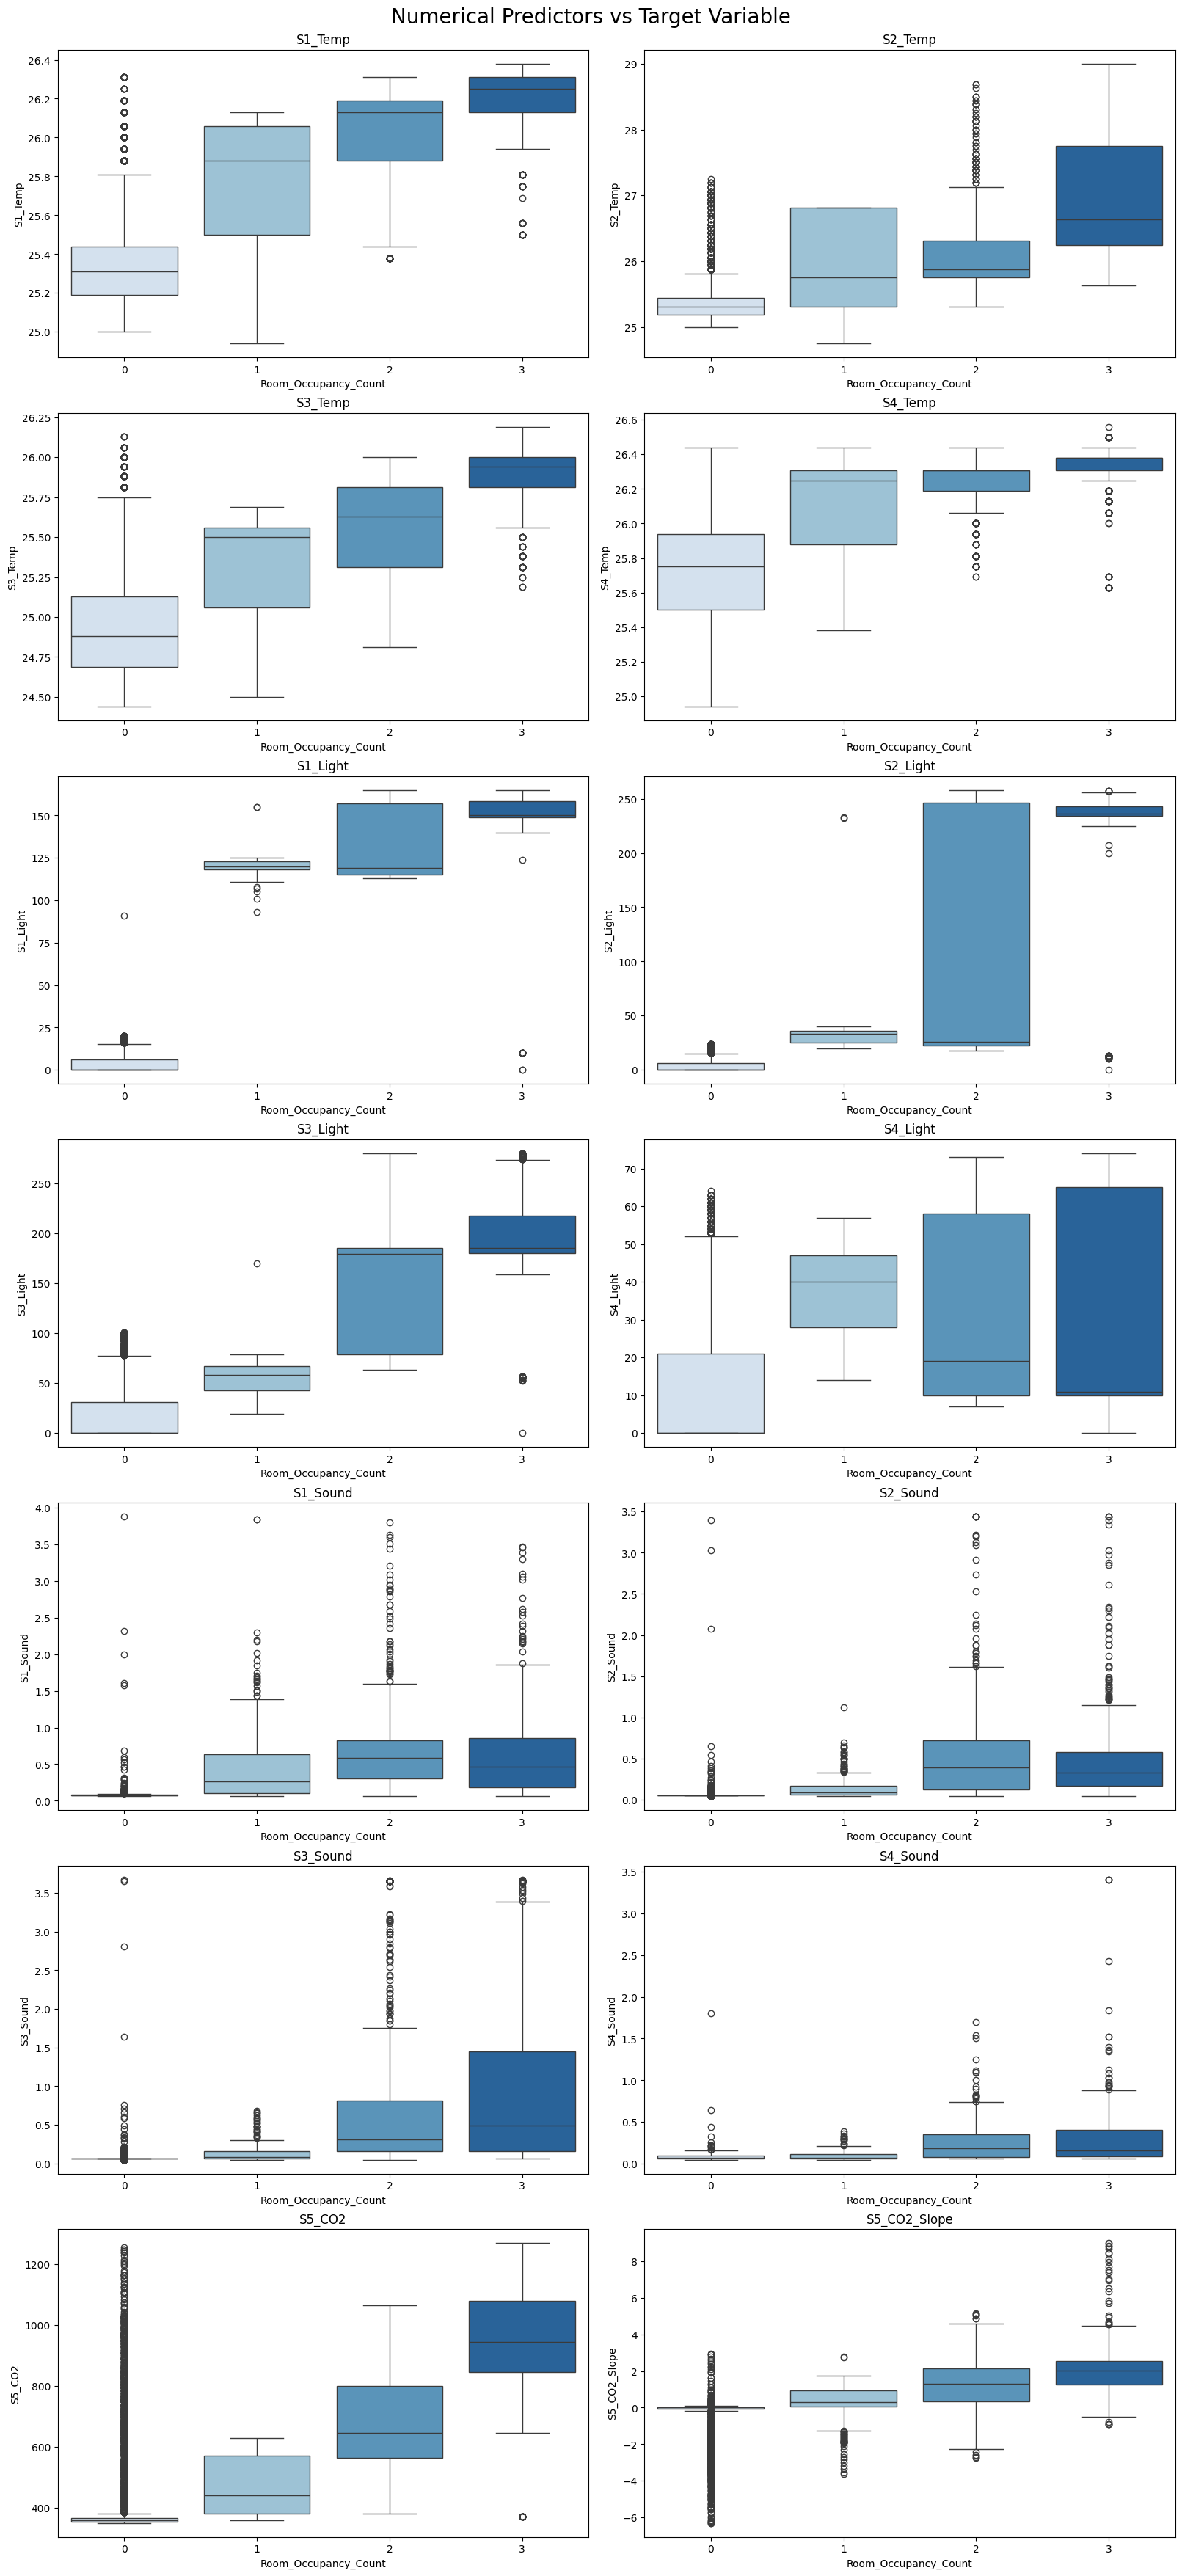

In [ ]:
import math

train_plot = X_train[numericals_train].copy()
train_plot['Room_Occupancy_Count'] = y_train

# Hitung grid subplot otomatis
n_plots = len(numericals_train)
n_cols = 2
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 5*n_rows), constrained_layout=True)
fig.suptitle('Numerical Predictors vs Target Variable', fontsize=20)

# jika axes 1D maka akan diubah menjadi 2D agar uniform
if n_rows == 1:
    axes = axes.reshape(1, -1)

col_index = 0
for row in range(n_rows):
    for col in range(n_cols):
        if col_index < n_plots:
            feature_name = numericals_train[col_index]
            sns.boxplot(
                ax=axes[row, col],
                x='Room_Occupancy_Count',
                y=feature_name,
                data=train_plot,
                palette='Blues'
            )
            axes[row, col].set_title(feature_name)
            col_index += 1
        else:
            axes[row, col].axis('off')

plt.show()


#### Categoricals Data

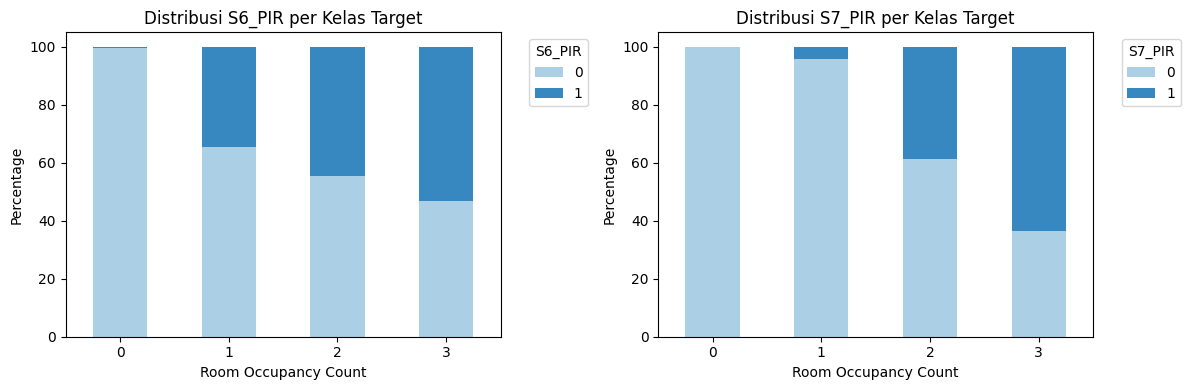

In [ ]:
# Grid size
n_cols = 2
n_rows = (len(categoricals_train) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

# Reshape axes jika hanya 1 baris
if n_rows == 1:
    axes = axes.reshape(1, -1)

for i, col in enumerate(categoricals_train):
    ax = axes[i // n_cols, i % n_cols]

    # Crosstab: target di X, fitur sebagai stack
    ctab = pd.crosstab(y_train, X_train[col], normalize='index') * 100

    # Warna dinamis berdasarkan jumlah kategori kolom fitur
    colors = sns.color_palette('Blues', n_colors=ctab.shape[1])

    # Plot
    ctab.plot(kind='bar', stacked=True, ax=ax, color=colors)

    ax.set_title(f'Distribusi {col} per Kelas Target')
    ax.set_ylabel('Percentage')
    ax.set_xlabel('Room Occupancy Count')
    ax.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Hapus plot kosong jika ada
if len(categoricals_train) % n_cols != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()


Observasi:
- Baik pada fitur numerik maupun kategori, masing-masing nilai pada target mampu membedakan dengan baik
- Fitur numerik divisualisasikan dengan boxplot sementara kategori melalui 100% stacked bar chart. Semakin tinggi tingkat okupansi maka rentang distribusi cenderung ikut naik
- Sehingga dipertimbangkan untuk menggunakan seluruh fitur untuk membangun dan model pelajari

## Modelling

Berdasarkan kondisi atas karakteristik data yang telah dilakukan sebelumnya yaitu nilai outlier yang wajar, memiliki nilai yang berkolerasi dan nilai fitur kategori yang tidak seimbang, maka model yang dipilih adalah sebagai berikut:
- Decision Tree (baseline)
- SVM RBF
- Random Forest
- XGBoost

### Define Feature: Homogen and Heterogen

In [ ]:
# Define feature
temp_features = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']
light_features = ['S1_Light', 'S2_Light', 'S3_Light', 'S4_Light']
sound_features = ['S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound']
pir_features = ['S6_PIR', 'S7_PIR']
co2_features = ['S5_CO2']
co2_slope_features = ['S5_CO2_Slope']

# Set of features
feature_sets = {
    'temp': temp_features,
    'light': light_features,
    'sound': sound_features,
    'pir': pir_features,
    'co2': co2_features,
    'co2_slope_features': co2_slope_features,
    'co2_co2Slope': co2_features + co2_slope_features,
    'heterogen_1': temp_features + co2_features + co2_slope_features,
    'heterogen_2': temp_features + co2_features + co2_slope_features + sound_features,
    'heterogen_3': temp_features + co2_features + co2_slope_features + sound_features + pir_features,
    'heterogen_4': temp_features + co2_features + co2_slope_features + sound_features + pir_features + light_features
}


Observasi:
- Fitur-fitur yang akan diuji dibagi menjadi 2 kelompok yaitu homogen dan heterogen. Fitur homogen adalah fitur yang terdiri dari fitur yang sejenis sementara heterogen merupakan kumpulan dari berbagai jenis fitur yang berbeda. Seiring meningkatnya nilai pada nama variabel heterogen maka semakin banyak kombinasi fitur yang digunakan
- Pengujian beberapa kelompok fitur dilakukan untuk melihat kontribusi masing-masing kelompok, seberapa baik dalam membuat keputusan
- Hal ini pula untuk memperoleh gambaran skenario di kondisi nyata jika terdapat salah satu sensor yang rusak atau tidak memiliki kinerja optimal

### First Experiment: Resample Models with OverSampling

#### Build Model and Pipeline

Pada eksperimen pertama, model yang akan dibangun menerapkan metode resample yang sederhana yaitu Random Over Sampling karena persoalan data yang tidak seimbang (imbalanced data). Model SVM RBF adalah satu-satunya model yang discalling dengan Robust Scaller (scaller untuk menghandle nilai yang outlier secara efektif) sementara model yang lainnya tidak dilakukan karena tidak diperlukan.

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

ros = RandomOverSampler(random_state=42)

pipe_dt = Pipeline([
    ('ros', ros),
    ('clf',  DecisionTreeClassifier(random_state=42))
])

pipe_svm = Pipeline([
    ('scaler', RobustScaler()),
    ('ros', ros),
    ('clf', SVC(kernel='rbf', random_state=42))
])

pipe_rf = Pipeline([
    ('ros', ros),
    ('clf', RandomForestClassifier(random_state=42))
])

pipe_xgb = Pipeline([
    ('ros', ros),
    ('clf', XGBClassifier(random_state=42))
])

models = {
    'Decision Tree (Baseline)': pipe_dt,
    'SVM': pipe_svm,
    'Random Forest': pipe_rf,
    'XGBoost': pipe_xgb
}


#### Evaluation

Evaluasi dilakukan melalui 3 metode, yaitu evaluasi target dengan data train, cross validation, dan final evaluation menggunakan data test. Karena pada data train dan test tidak representatif, maka metode evaluasi yang utama digunakan untuk menilai performa model dengan cross validation.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
# fungsi untuk menampilkan 3 metode evaluasi yaitu train, cross validation, dan final evaluation yaitu data test
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name='', feat_set_name=''):
    scoring = {
        'accuracy': 'accuracy',
        'f1_macro': make_scorer(f1_score, average='macro')
    }

    tscv = TimeSeriesSplit(n_splits=5)

    print("Cross-validation results:")
    scores = cross_validate(model, X_train, y_train, cv=tscv, scoring=scoring, n_jobs=-1)
    cv_accuracy = np.mean(scores['test_accuracy'])
    cv_f1 = np.mean(scores['test_f1_macro'])
    print(f"  Mean CV Accuracy  : {cv_accuracy:.4f}")
    print(f"  Mean CV F1 Macro  : {cv_f1:.4f}")

    # Train
    model.fit(X_train, y_train)

    # Train Evaluation
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='macro')

    print("\nEvaluation on training set:")
    print(f"  Train Accuracy : {train_accuracy:.4f}")
    print(f"  Train F1 Macro : {train_f1:.4f}")

    # Test Evaluation
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='macro')

    print("\nFinal evaluation on test set:")
    print(f"  Test Accuracy : {test_accuracy:.4f}")
    print(f"  Test F1 Macro : {test_f1:.4f}")
    print("-"*40)

    # Kumpulkan hasil evaluasi ke DataFrame
    results = pd.DataFrame([
        {'Set': 'Train', 'Accuracy': train_accuracy, 'F1 Macro': train_f1},
        {'Set': 'CV (Mean)', 'Accuracy': cv_accuracy, 'F1 Macro': cv_f1},
        {'Set': 'Test', 'Accuracy': test_accuracy, 'F1 Macro': test_f1}
    ])
    results['Model'] = model_name
    results['Feature Set'] = feat_set_name

    return y_test, y_test_pred, results


In [ ]:
# fungsi untuk menjalankan seluruh eksperimen dan menjalankan fungsi evaluate model
def run_experiments(df_model, target_col, feature_sets, models, split_ratio=0.8):
    import pandas as pd

    all_results = []

    # Split data sekali di awal
    X_train_full, X_test_full, y_train, y_test = temporal_train_test_split(df_model, target_col, split_ratio)

    for feat_set_name, features in feature_sets.items():
        print(f"\n=== Feature Set: {feat_set_name} ===")
        X_train = X_train_full[features]
        X_test = X_test_full[features]

        for model_name, model in models.items():
            print(f"Model: {model_name}")
            _, _, results_df = evaluate_model(
                model, X_train, y_train, X_test, y_test,
                model_name=model_name,
                feat_set_name=feat_set_name
            )
            all_results.append(results_df)

    # menggabung seluruh hasil
    final_results = pd.concat(all_results, ignore_index=True)

    # Simpan ke Excel
    final_results.to_excel("all_model_results.xlsx", index=False)


In [ ]:
run_experiments(df_model, 'Room_Occupancy_Count', feature_sets, models)


=== Feature Set: temp ===
Model: Decision Tree (Baseline)
Cross-validation results:
  Mean CV Accuracy  : 0.5861
  Mean CV F1 Macro  : 0.2569

Evaluation on training set:
  Train Accuracy : 0.9885
  Train F1 Macro : 0.9720

Final evaluation on test set:
  Test Accuracy : 0.8509
  Test F1 Macro : 0.3432
----------------------------------------
Model: SVM
Cross-validation results:
  Mean CV Accuracy  : 0.5750
  Mean CV F1 Macro  : 0.3300

Evaluation on training set:
  Train Accuracy : 0.9451
  Train F1 Macro : 0.8641

Final evaluation on test set:
  Test Accuracy : 0.8751
  Test F1 Macro : 0.3828
----------------------------------------
Model: Random Forest
Cross-validation results:
  Mean CV Accuracy  : 0.6218
  Mean CV F1 Macro  : 0.2876

Evaluation on training set:
  Train Accuracy : 0.9868
  Train F1 Macro : 0.9682

Final evaluation on test set:
  Test Accuracy : 0.8554
  Test F1 Macro : 0.3455
----------------------------------------
Model: XGBoost
Cross-validation results:
  Mean 

Observasi:
- Pada fitur hetergoen 4 yaitu kombinasi seluruh fitur dengan model Random Forest (baseline) memiliki performa yang jauh lebih baik saat ditambahkan fitur lampu yaitu 0,8745. Pada kelompok heterogen tanpa fitur lampu, maka rata-rata yang diperoleh hanya di bawah 0,51. Fitur lampu sangat penting untuk meningkatkan performa model
- Sementara kelompok fitur homogen, sensor lampu pada model SVM RBF memiliki performa rata-rata F1 Score pada cross validation yang sangat baik yaitu 0,8989 dimana mampu mengalahkan performa heterogen 4


### Second Experiment: Without Resample

#### Build Model and Pipeline

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

# Custom pipeline class untuk sample_weight
class SampleWeightPipeline(Pipeline):
    def fit(self, X, y, **fit_params):
        if hasattr(self, 'sample_weight_') and self.sample_weight_ is not None:
            fit_params[self.steps[-1][0] + '__sample_weight'] = self.sample_weight_
        return super().fit(X, y, **fit_params)

# Pipeline seluruh model
pipe_dt_1 = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

pipe_svm_1 = Pipeline([
    ('scaler', RobustScaler()),
    ('clf', SVC(kernel='rbf', random_state=42, class_weight='balanced'))
])

pipe_rf_1 = Pipeline([
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

pipe_xgb_1 = SampleWeightPipeline([
    ('clf', XGBClassifier(objective='multi:softprob', num_class=4, random_state=42))
])

# Hitung sample_weight dari y_train
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Sisipkan ke pipeline XGBoost
pipe_xgb_1.sample_weight_ = sample_weights

# Masukkan semua ke dictionary
models_1 = {
    'Decision Tree (Baseline)': pipe_dt_1,
    'SVM': pipe_svm_1,
    'Random Forest': pipe_rf_1,
    'XGBoost': pipe_xgb_1
}


#### Evaluation

In [ ]:
run_experiments(df_model, 'Room_Occupancy_Count', feature_sets, models_1)


=== Feature Set: temp ===
Model: Decision Tree (Baseline)
Cross-validation results:
  Mean CV Accuracy  : 0.5911
  Mean CV F1 Macro  : 0.2674

Evaluation on training set:
  Train Accuracy : 0.9885
  Train F1 Macro : 0.9720

Final evaluation on test set:
  Test Accuracy : 0.8509
  Test F1 Macro : 0.3432
----------------------------------------
Model: SVM
Cross-validation results:
  Mean CV Accuracy  : 0.5600
  Mean CV F1 Macro  : 0.4224

Evaluation on training set:
  Train Accuracy : 0.9435
  Train F1 Macro : 0.8615

Final evaluation on test set:
  Test Accuracy : 0.8712
  Test F1 Macro : 0.3607
----------------------------------------
Model: Random Forest
Cross-validation results:
  Mean CV Accuracy  : 0.6388
  Mean CV F1 Macro  : 0.2594

Evaluation on training set:
  Train Accuracy : 0.9895
  Train F1 Macro : 0.9735

Final evaluation on test set:
  Test Accuracy : 0.8554
  Test F1 Macro : 0.3455
----------------------------------------
Model: XGBoost
Cross-validation results:
  Mean 

Observasi:
- Performa kelompok homogen terbaik diraih oleh fitur lampu. Fitur lampu dengan model SVM RBF tanpa resample dan dengan resample memiliki performa yang sama yaitu memiliki rata-rata F1 Score 0,8989. Sementara fitur yang lain selain PIR dan temperatur, model yang sebelumnya terbaik menunjukkan penurunan yang kecil. Fitur PIR memiliki performa yang sama dengan sebelum dan sesudah resample sementara fitur temperatur mengalami sedikit peningkatan pada model terbaik sebelumnya yaitu SVM RBF
- Kelompok heterogen terbaik yaitu heterogen 4 menunjukkan peningkatan namun dengan model yang berbeda, yang sebelumnya (dengan resample Random Over Sampling) model terbaik adalah Random Forest bernilai 0,8745 menjadi bernilai 0,8834 dengan model XGBoost

### Third Experiment: Hyperparameter Tuning of the Best Version

#### Build Model and Pipeline

Hyperparameter tuning dilakukan hanya pada model terbaik tanpa resample karena bekerja lebih baik dan hanya dilakukan pada kelompok heterogen terbaik agar model dapat menghadapi berbagai situasi di kondisi nyata yang akan sangat bervariasi. Jika hanya berfokus pada fitur homogen yang menjadi kelompok terbaik mengalahkan performa heterogen maka di situasi nyata tidak menjamin jika sensor lampu akan terus bekerja dengan baik.

Karena tuning menggunakan metode Grid Search CV yang akan mengecek seluruh kombinasi parameter dan memakan waktu yang cukup lama untuk berproses, maka hanya 2 model terbaik yang dioptimalkan kinerjanya. Berikut model yang akan melalui hyperparameter tuning:
- Random Forest
- XGBoost

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Custom Pipeline untuk sample_weight (XGBoost only)
class SampleWeightPipeline(Pipeline):
    def fit(self, X, y, **fit_params):
        if hasattr(self, 'sample_weight_') and self.sample_weight_ is not None:
            fit_params[self.steps[-1][0] + '__sample_weight'] = self.sample_weight_
        return super().fit(X, y, **fit_params)

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Random Forest Pipeline
pipe_rf_2 = Pipeline([
    ('clf', RandomForestClassifier(
        class_weight='balanced',
        random_state=42
    ))
])

# XGBoost Pipeline + sample_weight
pipe_xgb_2 = SampleWeightPipeline([
    ('clf', XGBClassifier(
        objective='multi:softprob',
        num_class=4,
        random_state=42
    ))
])

# Parameter Grid (Benchmark)
param_grid_rf = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2']
}

param_grid_xgb = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6, 0.8, 1.0],
    'clf__gamma': [0, 0.25, 0.5],
    'clf__min_child_weight': [1, 3, 5]
}

# Compute Sample Weight (untuk XGBoost)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
pipe_xgb_2.sample_weight_ = sample_weights


In [ ]:
search_rf = GridSearchCV(pipe_rf_2, param_grid_rf, cv=tscv, scoring='f1_macro', n_jobs=-1)
search_rf.fit(X_train, y_train)

search_xgb = GridSearchCV(pipe_xgb_2, param_grid_xgb, cv=tscv, scoring='f1_macro', n_jobs=-1)
search_xgb.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SampleWeightPipeline(steps=[('clf',
                                                    XGBClassifier(base_score=None,
                                                                  booster=None,
                                                                  callbacks=None,
                                                                  colsample_bylevel=None,
                                                                  colsample_bynode=None,
                                                                  colsample_bytree=None,
                                                                  device=None,
                                                                  early_stopping_rounds=None,
                                                                  enable_categorical=False,
                                                                  eval_metric=None,
                                                                  feature_types=...
                                                                  multi_strategy=None,
                                                                  n_estimators=None,
                                                                  n_jobs=None,
                                                                  num_class=4,
                                                                  num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'clf__colsample_bytree': [0.6, 0.8, 1.0],
                         'clf__gamma': [0, 0.25, 0.5],
                         'clf__learning_rate': [0.01, 0.05, 0.1],
                         'clf__max_depth': [3, 5, 7],
                         'clf__min_child_weight': [1, 3, 5],
                         'clf__n_estimators': [100, 200, 300],
                         'clf__subsample': [0.6, 0.8, 1.0]},
             scoring='f1_macro')

#### Evaluation

In [ ]:
# Print Results
print("\n Best Random Forest:")
print(search_rf.best_params_)
print(f"Best CV F1 Macro RF: {search_rf.best_score_:.4f}")

print("\n Best XGBoost:")
print(search_xgb.best_params_)
print(f"Best CV F1 Macro XGB: {search_xgb.best_score_:.4f}")

# mengambil model terbaik
best_rf = search_rf.best_estimator_
best_xgb = search_xgb.best_estimator_


 Best Random Forest:
{'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best CV F1 Macro RF: 0.8732

 Best XGBoost:
{'clf__colsample_bytree': 0.8, 'clf__gamma': 0.5, 'clf__learning_rate': 0.05, 'clf__max_depth': 5, 'clf__min_child_weight': 1, 'clf__n_estimators': 200, 'clf__subsample': 1.0}
Best CV F1 Macro XGB: 0.8820


In [ ]:
search_rf.best_estimator_.fit(X_train, y_train)
y_train_pred = search_rf.best_estimator_.predict(X_train)

f1_score(y_train, y_train_pred, average='macro')

1.0

In [ ]:
search_xgb.best_estimator_.fit(X_train, y_train)
y_train_pred = search_xgb.best_estimator_.predict(X_train)

f1_score(y_train, y_train_pred, average='macro')

0.9986091169016019

Observasi:
- Parameter terbaik pada model Random Forest adalah 'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200
yang memiliki nilai terbaik dari hasil cross validation F1 Score adalah 0,8732
- Sementara XGBoost sedikit lebih unggul yaitu dengan F1 Score dengan nilai 0,8820
- Nilai yang hampir dan telah sempurna ketika best parameter diterapkan pada data train padahal telah dituning diakibatkan oleh beberapa hal. Sebagaimana yang telah dijelaskan sebelumnya bahwa data train maupun data test tidak representatif dan tidak dapat digunakan untuk mengukur performa. Sehingga penilaian performa hanya fokus pada metode cross validation

### Evaluation of Best Tuning: XGBoost

#### Build Model and Pipeline

Model yang akan dievaluasi dan diinterpretasi merupakan model XGBoost dengan ukuran parameter terbaik yang telah diperoleh pada proses hyperparameter tuning dan tanpa resample namun dengan pengaturan balanced model sample weight yang dimiliki oleh XGBoost

In [ ]:
pipe_xgb_best = SampleWeightPipeline([
    ('scaler', RobustScaler()),
    ('clf', XGBClassifier(
        objective='multi:softprob',
        num_class=4,
        random_state=42,
        colsample_bytree=0.8,
        gamma=0.5,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=1,
        n_estimators=200,
        subsample=1.0
    ))
])

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
pipe_xgb_best.sample_weight_ = sample_weights

models_2 = {
    'XGBoost Tuned': pipe_xgb_best,
}

#### Evaluation

In [ ]:
run_experiments(df_model, 'Room_Occupancy_Count', feature_sets, models_2)


=== Feature Set: temp ===
Model: XGBoost Tuned
Cross-validation results:
  Mean CV Accuracy  : 0.6191
  Mean CV F1 Macro  : 0.3179

Evaluation on training set:
  Train Accuracy : 0.9762
  Train F1 Macro : 0.9466

Final evaluation on test set:
  Test Accuracy : 0.8583
  Test F1 Macro : 0.3822
----------------------------------------

=== Feature Set: light ===
Model: XGBoost Tuned
Cross-validation results:
  Mean CV Accuracy  : 0.9850
  Mean CV F1 Macro  : 0.8871

Evaluation on training set:
  Train Accuracy : 0.9980
  Train F1 Macro : 0.9937

Final evaluation on test set:
  Test Accuracy : 0.8993
  Test F1 Macro : 0.4450
----------------------------------------

=== Feature Set: sound ===
Model: XGBoost Tuned
Cross-validation results:
  Mean CV Accuracy  : 0.9003
  Mean CV F1 Macro  : 0.3600

Evaluation on training set:
  Train Accuracy : 0.9157
  Train F1 Macro : 0.7778

Final evaluation on test set:
  Test Accuracy : 0.7868
  Test F1 Macro : 0.4485
----------------------------------

Observasi:
- Performa pada metode evaluasi cross validation setelah diterapkan parameter tuning terbaik terjadi sedikit peningkatan sebesar 0,0011, dari yang semula bernilai 0,8834 menjadi 0,8845

### Visualization of Evaluation: Feature with Best Model

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels=None, normalize=False, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
        cm = np.nan_to_num(cm)  # handle divide-by-zero

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd',
                xticklabels=labels if labels else sorted(set(y_true)),
                yticklabels=labels if labels else sorted(set(y_true)),
                cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

In [ ]:
y_test_best, y_pred_best, results_best = evaluate_model(pipe_xgb_best, X_train, y_train, X_test, y_test)

Cross-validation results:
  Mean CV Accuracy  : 0.9803
  Mean CV F1 Macro  : 0.8820

Evaluation on training set:
  Train Accuracy : 1.0000
  Train F1 Macro : 1.0000

Final evaluation on test set:
  Test Accuracy : 0.9146
  Test F1 Macro : 0.4922
----------------------------------------


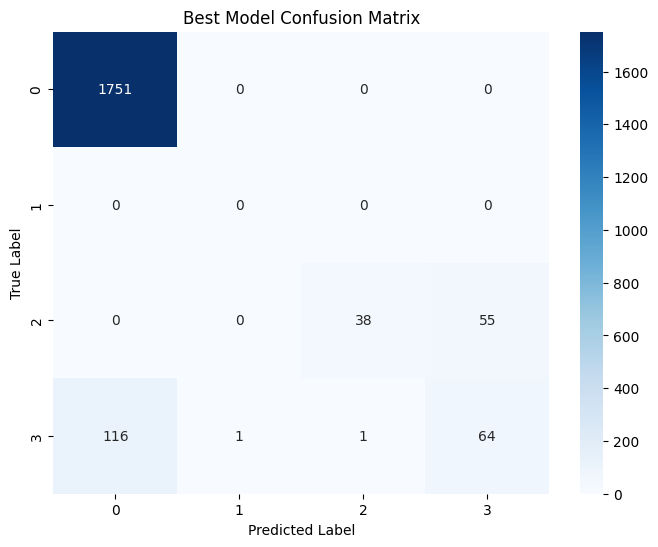

In [ ]:
plot_confusion_matrix(y_test_best, y_pred_best, labels=[0,1,2,3], title='Best Model Confusion Matrix')

#### AUC ROC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

def evaluate_auc_roc(model, X_test, y_test, class_labels, plot=False):
    # Binarize y_test untuk multiclass ROC AUC
    y_test_bin = label_binarize(y_test, classes=class_labels)

    # Predict probabilitas
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        raise ValueError("Model doesn't support predict_proba, required for ROC AUC.")

    # Hitung macro-average ROC AUC
    auc_score = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    print(f"🔹 ROC AUC (macro average): {auc_score:.4f}")

    if plot:
        plt.figure(figsize=(8, 6))
        for i, label in enumerate(class_labels):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            plt.plot(fpr, tpr, label=f"Class {label} (AUC = {auc(fpr, tpr):.2f})")

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (Multiclass)")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

    return auc_score


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


🔹 ROC AUC (macro average): nan


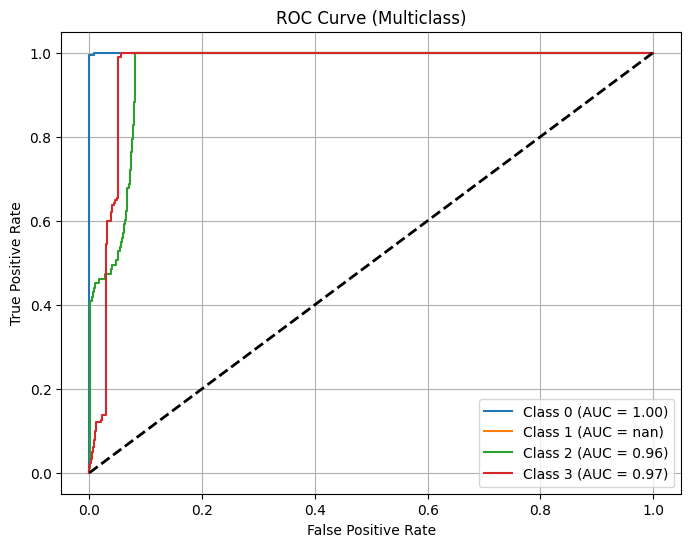

nan

In [ ]:
evaluate_auc_roc(pipe_xgb_best, X_test, y_test, class_labels=[0, 1, 2, 3], plot=True)

Observasi:
- Metrik evaluasi untuk final evaluation menggunakan data test (konteks: data tidak representatif) yang digunakan adalah confusion matrix dan visualisasi AUC ROC
- Model XGBoost banyak menilai secara benar pada nilai 0 karena nilai tersebut merupakan nilai yang dominan. Sementara nilai 2 kesalahan yang terjadi hanya sedikit yaitu berjumlah 38 dan hanya keliru 1 kali. Perbandingan jumlah yang benar dan salah pada nilai 3 hampir seimbang. Sementara nilai 1 tidak diketahui total prediksi yang benar karena data test tidak mengandung nilai tersebut
- AUC ROC menunjukkan nilai yang sangat baik (kecuali nilai 1 karena tidak terdapat di data test), kelas 0 memiliki skor yang 1.00 sementara kelas 2 dan 3 hampir mendekati satu. Kurva menunjukkan arah yang sangat jauh dari garis diagonal

## Interpretability Model

In [ ]:
# initiate explainer untuk model XGBoost
xgb_exp = dx.Explainer(pipe_xgb_best, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8103 rows 16 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8103 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7ea9ba8e6ca0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00013, mean = 0.0569, max = 0.999
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0228, mean = 0.351, max = 3.0
  -> model_info        : package __main__

A new explainer has been created!


In [ ]:
# visualisasi permutation feature importance untuk XGBoost model
xgb_exp.model_parts().plot()

Observasi:
- Metode yang digunakan untuk melihat fitur yang dinilai penting oleh model adalah menggunakan permutasi
- 3 fitur teratas yang memiliki skor paling tinggi diraih oleh fitur Sound (suara) dengan lokasi S1, S2, S3
- Fitur 3 terbawah dan bernilai negatif adalah `S1_Light`, `S2_Temp`, dan `S4_Light`
- Berdasarkan hasil eksperimen yang telah dilakukan maka rekomendasi yang diberikan adalah sebagai berikut:
1. Tetap menggunakan sensor<br>
 Jika alat sensor tetap digunakan, maka metode sama dengan yang dilakukan sebelumnya yaitu berbasis waktu namun perlu dilakukan penambahan data lebih banyak lagi dan dipantau secara real time agar tergenalisir dengan baik dan menghadapi resiko jika tidak dapat dideploy secara baris per baris karena perlu diproses beberapa waktu untuk menghasilkan co2 slope
2. Upgrade alat sensor<br>
  Jika alat sensor co2 diupgrade menjadi lebih responsif sehingga perubahan dapat secara otomatis diketahui maka pembagian data untuk pembuatan model tidak perlu memperhatikan rentang waktu, sehingga data walaupun jumlahnya tidak terlalu banyak (seperti jumlah yang sekarang) tetap dapat digunakan dan model tetap dapat belajar dengan baik, serta keunggulan lainnya dapat di deploy secara per baris.